In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
from IPython.core.display import HTML
import re
import json

%matplotlib inline

In [2]:
# Import MoMA dataset

df = pd.read_csv('data/data-1589133901203-moma-artwork-data.csv')

# Explore Dataset

In [3]:
df.columns

Index(['index', 'Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference_cm', 'Depth_cm', 'Diameter_cm', 'Height_cm', 'Length_cm',
       'Weight_kg', 'Width_cm', 'SeatHeight_cm', 'Duration_sec', 'updated_at'],
      dtype='object')

In [4]:
df_cat = df[['index', 'Classification']].groupby('Classification').count().sort_values('index', ascending=False)

In [5]:
# calculate proportion of art records in each category

df_cat['perc_proportion'] = round(df_cat['index']/ df.shape[0], 2)*100

In [6]:
df_cat

,index,perc_proportion
Classification,,
Print,20039,29.0
Photograph,15890,23.0
Drawing,9525,14.0
Design,7218,10.0
Illustrated Book,4961,7.0
Architecture,2130,3.0
Painting,2102,3.0
Mies van der Rohe Archive,1618,2.0
Video,1353,2.0


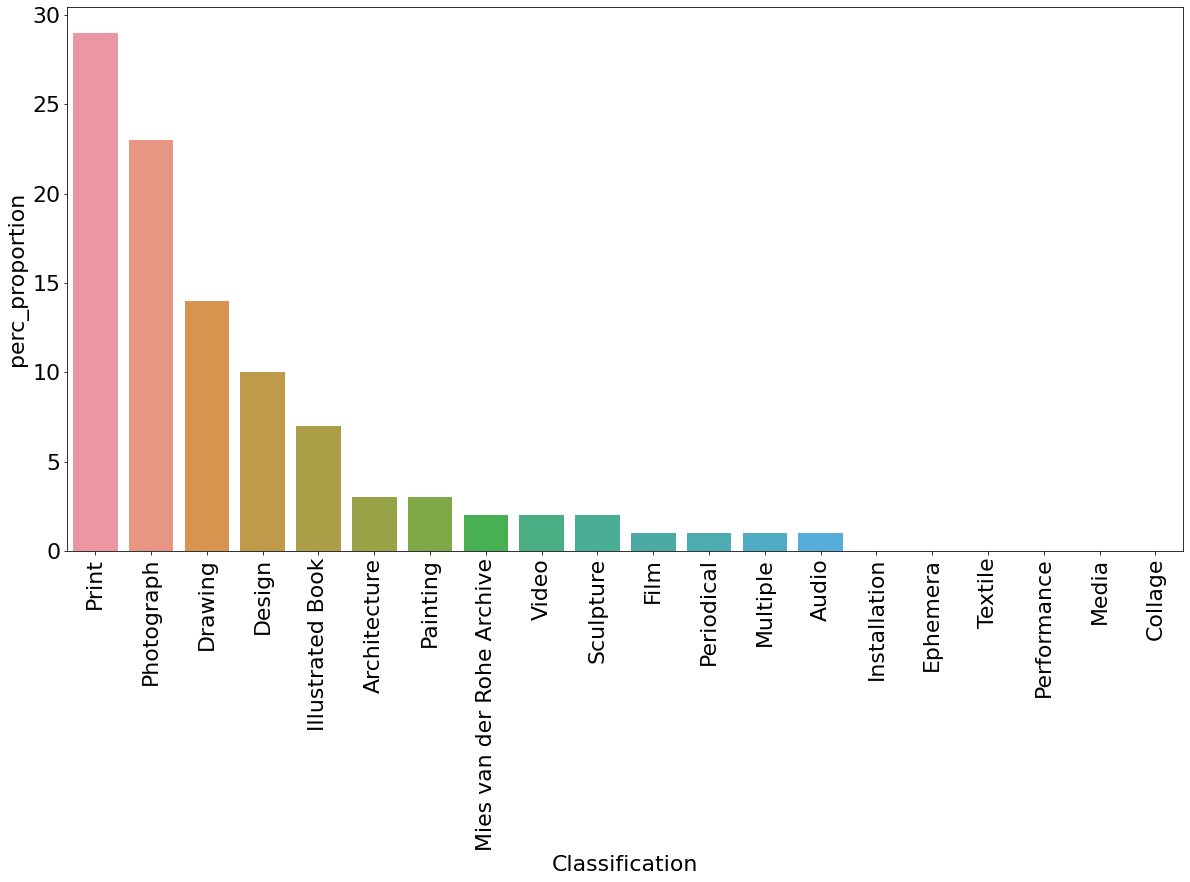

In [7]:
# Plot top 20 Classifications

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))

sns.barplot(x=df_cat.index[:20], 
            y=df_cat['perc_proportion'][:20])

plt.xticks(rotation='vertical')

plt.show()

## Categories we are interested in

For our problem we are interested in the following categories:
    - Painting
    - Print or Multiple
    - Drawing
    - Sculpture
    - Decorative Object
    - Furniture
    - Photograph
    - Installation
    - Other
   

In [10]:
# Explore data for each category of interest

for cat in df_cat.index:
    # generate category listings
    sub_df = df[df['Classification'] == cat]
    
    # Colums interested in
    cols_to_display = ['Title'
                       ,'Medium'
                       , 'Dimensions'
                       , 'Department'
                       , 'Circumference_cm'
                       , 'Depth_cm'
                       , 'Diameter_cm'
                       , 'Height_cm'
                       , 'Length_cm'
                       , 'Weight_kg'
                       , 'Width_cm'
                       , 'SeatHeight_cm'
                       , 'Duration_sec'
                       , 'ThumbnailURL']
    
    if sub_df.shape[0] > 30:
        print ("___________________",  cat,  "___________________")
        display(sub_df[cols_to_display].sample(10))

___________________ Print ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
55363,Careers Today . . . How Children Fail from Gen...,Screenprint from a portfolio of thirty-four ph...,"composition and sheet: 14 15/16 x 10"" (38 x 25...",Drawings & Prints,NaN,NaN,NaN,38.0,NaN,NaN,25.4,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIzMTU3NiJd...
30658,Airplane I (Flugzeug I),Screenprint,"composition 19 1/16 x 31 1/2"" (48.5 x 80 cm)\...",Drawings & Prints,NaN,NaN,NaN,48.5,NaN,NaN,80.0,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMTgzMiJd...
30523,Untitled,"Etching, drypoint, and aquatint","composition: 10 1/2 x 19 5/16"" (26.7 x 49.1cm)...",Drawings & Prints,NaN,NaN,NaN,26.7,NaN,NaN,49.1,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxOTY3OCJd...
57274,Light Side/Dark Side from 2006: Trance/Borders,Digital print from a portfolio of three digita...,"composition: 15 15/16 x 17 5/8"" (40.5 x 44.7 c...",Drawings & Prints,NaN,NaN,NaN,40.5,NaN,NaN,44.7,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI0Nzg3NCJd...
29633,Ice Skating (Eislauf),Lithograph,"composition (irreg.): 16 1/8 x 9 1/2"" (40.9 x ...",Drawings & Prints,NaN,NaN,NaN,40.9,NaN,NaN,24.2,NaN,NaN,http://www.moma.org/media/W1siZiIsIjExNjQ2OSJd...
28352,Plate for Untitled (4),Engraving and drypoint on steel-faced copper p...,"plate 14 7/8 x 17 7/8"" (37.8 x 45.4 cm)",Drawings & Prints,NaN,NaN,NaN,37.8,NaN,NaN,45.4,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMyOTgzNSJd...
56116,Cosmic Seeds Light / Beej Brahmaand Ek,Etching and aquatint on twenty cotton pulp she...,dimensions variable upon installation,Drawings & Prints,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIzOTk0OCJd...
55938,Untitled from Passing Bells,Etching and aquatint from a portfolio of 27 et...,"plate: 6 7/8 x 5 13/16"" (17.5 x 14.7 cm); shee...",Drawings & Prints,NaN,NaN,NaN,17.5,NaN,NaN,14.7,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIzNzYxNyJd...
26283,"Cut Out Nude from 11 Pop Artists, Volume I",Screenprint from a portfolio of ten screenprin...,"composition: 8 1/2 x 16 1/8"" (21.6 x 41cm); sh...",Drawings & Prints,NaN,NaN,NaN,21.6,NaN,NaN,41.0,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIwNjI4MSJd...
23564,Alraunen (Hobgoblins) [Mandrakes (Kobolde)],Woodcut,"composition and sheet: 4 9/16 x 3 1/4"" (11.6 x...",Drawings & Prints,NaN,NaN,NaN,11.6,NaN,NaN,8.3,NaN,NaN,http://www.moma.org/media/W1siZiIsIjExNzQzMiJd...


___________________ Photograph ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
21266,Kiln,Gelatin silver print,"6 7/16 x 9 3/8"" (16.4 x 23.8 cm)",Photography,NaN,NaN,NaN,16.400000,NaN,NaN,23.800000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE4NjYwMyJd...
67687,Bondage Device: Cross,"Pigmented inkjet print, printed 2014","18 1/2 × 12 3/8"" (47 × 31.4 cm)",Photography,NaN,NaN,NaN,46.990094,NaN,NaN,31.432563,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQxMDc0MSJd...
20831,"Winter Garden Now, 1925 Movies",Gelatin silver print,"8 1/8 x 6 1/4"" (20.6 x 15.9 cm)",Photography,NaN,NaN,NaN,20.600000,NaN,NaN,15.900000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE2NzY3NCJd...
43317,"Foothill Road, Beverly Hills, California, Sept...","Chromogenic color print, printed 1992","17 13/16 x 14 3/16"" (45.3 x 36 cm)",Photography,NaN,NaN,NaN,45.300000,NaN,NaN,36.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIzMzYwNSJd...
50379,Smoke and the Lovers,"Gelatin silver print, printed 2009","12 3/8 x 18 1/2"" (31.4 x 47 cm)",Photography,NaN,NaN,NaN,31.400000,NaN,NaN,47.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI0MTQ2MiJd...
18785,Paris,Gelatin silver print,"8 1/8 x 12 1/4"" (20.8 x 31.1 cm)",Photography,NaN,NaN,NaN,20.800000,NaN,NaN,31.100000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI0NTAxMyJd...
52699,Untitled,Gelatin silver print,"4 15/16 x 3 1/8"" (12.5 x 7.9 cm)",Photography,NaN,NaN,NaN,12.500000,NaN,NaN,7.900000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMyMjM4NSJd...
20986,Untitled from the series Actual Photos,Silver dye bleach print,"9 3/8 x 6 3/8"" (23.9 x 16.2 cm)",Photography,NaN,NaN,NaN,23.900000,NaN,NaN,16.200000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIwMTc0MyJd...
21945,"""The Warsaw Ghetto""",Gelatin silver print,"6 5/16 x 9 5/16"" (16 x 23.7 cm)",Photography,NaN,NaN,NaN,16.000000,NaN,NaN,23.700000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIzNjc2NCJd...
18476,Laigh Kirk Close,Photogravure,"8 3/4 x 7"" (22.2 x 17.7 cm)",Photography,NaN,NaN,NaN,22.200000,NaN,NaN,17.700000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5NzE2NiJd...


___________________ Drawing ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
41536,Untitled (Log Cabin),Pencil on transparentized paper\r\n,"14 x 11"" (35.6 x 27.9 cm)",Drawings & Prints,NaN,NaN,NaN,35.560100,NaN,NaN,27.940100,NaN,NaN,http://www.moma.org/media/W1siZiIsIjEyNDA2NSJd...
57241,Work Drawing: 10 x Place Distance Place,"Watercolor, ink, and pencil on paper","11 5/8 x 8 1/4"" (29.5 x 21 cm)",Drawings & Prints,NaN,NaN,NaN,29.527559,NaN,NaN,20.955042,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI0OTA2MiJd...
48491,Untitled from The Tower of Terror Studies,Pencil on transparentized paper,"11 x 16 3/4"" (27.9 x 42.5 cm)",Drawings & Prints,NaN,NaN,NaN,27.940056,NaN,NaN,42.545085,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5OTI4MCJd...
11818,17.11.82,Pencil on paper,"11 5/8 x 8 1/4"" (29.5 x 21 cm)",Drawings & Prints,NaN,NaN,NaN,29.500000,NaN,NaN,21.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxNDAwOCJd...
37193,"Red Snapper, design for H.P. (Horsepower)",Watercolor and pencil on paper,"13 3/4 x 9 1/2"" (34.9 x 24.1 cm)",Drawings & Prints,NaN,NaN,NaN,34.925100,NaN,NaN,24.130000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE0MTgzMCJd...
63265,Cuadrado Negro o Malévich Lumpen (Black Square...,Synthetic polymer paint on cloth diaper,"28 1/2 x 23 3/4"" (72.4 x 60.3 cm)",Drawings & Prints,NaN,NaN,NaN,72.390145,NaN,NaN,60.325121,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMzNDgwNyJd...
51551,Untitled,Graphite and tape on vellum,"Sheet: 12 1/2 x 9 1/8"" (31.8 x 23.2 cm)",Media and Performance,NaN,NaN,NaN,31.750064,NaN,NaN,23.177546,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE4NDA1MCJd...
11612,"Canto XXI: Circle Eight, Bolgia 5, The Grafter...","Solvent transfer drawing, gouache, cut-and-pas...","14 3/8 × 11 1/2"" (36.5 × 29.2 cm)",Drawings & Prints,NaN,NaN,NaN,36.500000,NaN,NaN,29.200000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI4MzEyMSJd...
11865,Stocks,"Synthetic polymer paint, pencil, and pastel on...","37 x 23 1/8"" (94 x 58.7 cm)",Drawings & Prints,NaN,NaN,NaN,94.000000,NaN,NaN,58.700000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM4NzkyOCJd...
57234,Work Drawing: 10 x Place Distance Place,"Watercolor, ink, and pencil on paper","11 5/8 x 8 1/4"" (29.5 x 21 cm)",Drawings & Prints,NaN,NaN,NaN,29.527559,NaN,NaN,20.955042,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI0OTA0OCJd...


___________________ Design ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
955,Triad,Screenprinted cotton,"59 3/4 x 44"" (151.8 x 111.8 cm)",Architecture & Design,NaN,NaN,NaN,NaN,151.7653,NaN,111.760200,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIwMDc5NCJd...
1235,Tray,Sycamore wood,"diam. 14 3/4"" (37.5 cm)",Architecture & Design,NaN,NaN,37.5,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIwMTAiXSxb...
3996,"""A Yankee in Petrograd"" Vol. 3 Invitation Give...",Gravure,"7 x 5"" (17.9 x 12.7 cm)",Architecture & Design,NaN,NaN,NaN,17.900000,NaN,NaN,12.700000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjU5Mzk1Il0s...
2583,Fabric Sample,Wool and cotton,"10 3/4 x 11 3/8"" (27.3 x 28.9 cm)",Architecture & Design,NaN,NaN,NaN,27.300000,NaN,NaN,28.900000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjc0NTEiXSxb...
4059,Budowniczy Solness,Offset lithograph,"32 7/8 x 22 1/2"" (83.5 x 57.2 cm)",Architecture & Design,NaN,NaN,NaN,83.500000,NaN,NaN,57.200000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjY2ODkiXSxb...
65007,Manomètre letterhead (Letter from E. Malespine...,Letterpress,"10 5/8 × 8 1/4"" (27 × 21 cm)",Architecture & Design,NaN,NaN,NaN,26.987554,NaN,NaN,20.955042,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM0MzAyMSJd...
2340,Table Lamp,"Aluminum, steel, oak base, paper shade, and re...","17 3/4 x 14"" (45.1 x 35.5 cm)",Architecture & Design,NaN,NaN,35.5,45.100000,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjU5NTU3Il0s...
66883,Dear Data: Week 34 (Urban Animals / A Week of ...,".a: Ink, pencil, and marker on paper\r\n.b: In...",".a (Giorgia to Stefanie): 5 1/2 × 8 1/2"" (14 ×...",Architecture & Design,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQwNDc4MCJd...
57907,Pac-Man,Video game software,NaN,Architecture & Design,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI1NTc5MSJd...
1934,Cricket Bat (model 9000),Wood with rubber grip,"34 1/4 x 4 1/4"" (87 x 10.8 cm)",Architecture & Design,NaN,NaN,NaN,NaN,87.0000,NaN,10.800000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMDk1NiJd...


___________________ Illustrated Book ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
8713,The Cat (Le Chat) (plate VI) from Eaux-fortes ...,"Aquatint, drypoint, and engraving from an illu...","page: 14 3/16 x 11 1/4"" (36 x 28.5 cm)",Drawings & Prints,NaN,NaN,NaN,29.9,NaN,NaN,20.9,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE2MzU3MSJd...
7849,Plate (page 3) from The Tunning of Elynour Rum...,Wood engraving from an illustrated book with f...,"composition (irreg.): 5 11/16 × 6 1/8"" (14.4 ×...",Drawings & Prints,NaN,NaN,NaN,14.4,NaN,NaN,15.5,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE3MTU0OCJd...
6468,"Not-straight/Straight, Broken (plate, folio 14...",Etching from an illustrated book with twenty-e...,"composition and page: 10 9/16 × 10 9/16"" (26.9...",Drawings & Prints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM1NzkyNiJd...
8777,"Wendingen, No. 11",Journal with one lithograph and line block cover,"Composition: 12 9/16 x 25 9/16"" (31.9 x 65 cm)...",Drawings & Prints,NaN,NaN,NaN,31.9,NaN,NaN,65.0,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5MzA0MiJd...
68778,Plate (facing page 3) from Mazas,Lithograph from an illustrated book with ten l...,"composition: 12 5/8 × 9 7/16"" (32.1 × 24 cm); ...",Drawings & Prints,NaN,NaN,NaN,32.1,NaN,NaN,24.0,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQ1OTM5MSJd...
7482,In-text plate and text (folio 43) from DMT 42,One from an illustrated book with twenty-six s...,"composition (irreg.): 13 15/16 x 13 3/16"" (35....",Drawings & Prints,NaN,NaN,NaN,35.4,NaN,NaN,33.5,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM5Njg5MiJd...
8710,"The Grasshopper (La Sauterelle) (plate, facing...","Aquatint, etching, and drypoint from an illust...","composition (irreg.): 10 15/16 x 8 5/16"" (27.8...",Drawings & Prints,NaN,NaN,NaN,27.8,NaN,NaN,21.1,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE3Mzg1OSJd...
8019,Bagoa and the Generals before the Corpse of Ho...,Lithograph from an illustrated book with twent...,"composition (irreg.): 10 3/4 x 9 1/16"" (27.3 x...",Drawings & Prints,NaN,NaN,NaN,27.3,NaN,NaN,23.0,NaN,NaN,http://www.moma.org/media/W1siZiIsIjEyOTYzNSJd...
43760,Concordance,Illustrated book with 48 acrylic stencils and ...,"overall (approx. ): 10 1/16 x 235 7/16"" (25.5 ...",Drawings & Prints,NaN,NaN,NaN,25.5,NaN,NaN,598.0,NaN,NaN,http://www.moma.org/media/W1siZiIsIjExNzMwNyJd...
37592,K novom beregam muzykal'nogo iskusstva,Journal with letterpress cover,"page (each): 11 x 8 1/8"" (28 x 20.6 cm); overa...",Drawings & Prints,NaN,NaN,NaN,28.0,NaN,NaN,20.6,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI0ODE2MSJd...


___________________ Architecture ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
425,"Sher-e-Bangla Nagar, Capital of Bangladesh, Dh...",Charcoal and graphite on tracing paper,"12 x 24"" (30.5 x 61 cm)",Architecture & Design,NaN,NaN,NaN,30.500000,NaN,NaN,61.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjYyNDYiXSxb...
56,"The Manhattan Transcripts Project, New York, N...",Ink and cut-and-pasted gelatin silver photogra...,"19 x 31"" (48.3 x 78.7 cm)",Architecture & Design,NaN,NaN,NaN,48.300000,NaN,NaN,78.700000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM1NSJdLFsi...
58540,Struggle for Spatial Justice,Ink and marker on paper,"10 3/4 x 8 1/4"" (27.3 x 21 cm)",Architecture & Design,NaN,NaN,NaN,34.925070,NaN,NaN,28.575057,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI5MzE2NiJd...
60010,"A New Urban Ground, project (Plan of lower Man...",Pigmented inkjet print,"24 x 28 1/4"" (61 x 71.8 cm)",Architecture & Design,NaN,NaN,NaN,60.960122,NaN,NaN,71.755144,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI5NzQ1MSJd...
289,"Endless Theatre Project, Plan",Print mounted on board,"83 x 84"" (210.8 x 213.4 cm)",Architecture & Design,NaN,NaN,NaN,210.820400,NaN,NaN,213.360400,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5MjQyMyJd...
57603,Oxygen House Project (Elevation),Pencil on paper,"24 x 33"" (61 x 83.8 cm)",Architecture & Design,NaN,NaN,NaN,60.960122,NaN,NaN,83.820168,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI2MjcwNyJd...
58856,"Urban Proposal with Multi Thin-Shell Capsules,...",Ink on vellum,"16 1/2 x 11 5/8"" (41.9 x 29.5 cm)",Architecture & Design,NaN,NaN,NaN,41.910084,NaN,NaN,29.527559,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI2NTc3NiJd...
495,"Parc de la Villette, Paris, France (Follies an...",Gouache and color ink on gelatin silver photog...,"34 x 50"" (86.3 x 127 cm)",Architecture & Design,NaN,NaN,NaN,86.300000,NaN,NaN,127.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjY3NDkiXSxb...
252,"Church of the Light, Ibaraki, Osaka, Japan, In...",Color pencil (blue and black) on note paper,"10 1/8 x 7 1/8"" (25.7 x 18.1 cm)",Architecture & Design,NaN,NaN,NaN,25.717600,NaN,NaN,18.097500,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMTEyOCJd...
752,The Continuous Monument: New York Extrusion Pr...,"Graphite, color pencil, and cut-and-pasted pri...","38 x 25 3/4"" (96.5 x 65.4 cm)",Architecture & Design,NaN,NaN,NaN,96.520200,NaN,NaN,65.405100,NaN,NaN,http://www.moma.org/media/W1siZiIsIjExNzM5Il0s...


___________________ Painting ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
34537,Still Life #57,Oil on canvas and base of synthetic polymer pa...,"Overall 10' 3 1/8"" x 16' 2 7/8"" x 6' (312.5 x ...",Painting & Sculpture,NaN,182.8,NaN,312.500000,NaN,NaN,495.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI2MzI2NyJd...
57500,Graduating Girl (Version 2) #1,Silkscreen ink and oil crayon on canvas,"48 x 36"" (121.9 x 91.4 cm)",Painting & Sculpture,NaN,0.0,NaN,121.920244,NaN,NaN,91.440183,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI2NTU1MSJd...
34330,Superman,Oil on canvas,"40 1/2 x 35 7/8"" (102.9 x 91.2 cm)",Painting & Sculpture,NaN,NaN,NaN,102.900000,NaN,NaN,91.100000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE1MTQ3NyJd...
64673,Doctor Faustroll,Oil on canvas mounted on wood panel in artist ...,"14 1/2 × 13"" (36.8 × 33 cm)",Painting & Sculpture,NaN,0.0,NaN,36.830074,NaN,NaN,33.020066,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMzNDMyNyJd...
34511,The Enigma of a Day,Oil on canvas,"6' 1 1/4"" x 55"" (185.5 x 139.7 cm)",Painting & Sculpture,NaN,NaN,NaN,185.500000,NaN,NaN,139.700000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE1MDk5MyJd...
33705,Birthday,Oil on cardboard,"31 3/4 x 39 1/4"" (80.6 x 99.7 cm)",Painting & Sculpture,NaN,NaN,NaN,80.600000,NaN,NaN,99.700000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE1MTE4NiJd...
34219,Slowly Toward the North,Oil on canvas,"42 x 36"" (106.7 x 91.4 cm)",Painting & Sculpture,NaN,NaN,NaN,106.700000,NaN,NaN,91.400000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIwNDYxOSJd...
33022,The New Rich,Oil on canvas,"12 5/8 x 16 5/8"" (32.1 x 42.2 cm)",Painting & Sculpture,NaN,NaN,NaN,32.100000,NaN,NaN,42.200000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI5OTU1NSJd...
35876,Wired,Acrylic on masonite,"48 x 36"" (121.9 x 91.4 cm)",Painting & Sculpture,NaN,NaN,NaN,121.920200,NaN,NaN,91.440200,NaN,NaN,http://www.moma.org/media/W1siZiIsIjc0NTMxIl0s...
34034,Two,"Synthetic polymer paint on canvas, in two parts","Overall 8' 7 1/4"" x 15' 2 1/8"" (262.2 x 457.8 cm)",Painting & Sculpture,NaN,NaN,NaN,262.200000,NaN,NaN,457.800000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQwMjg4MCJd...


___________________ Mies van der Rohe Archive ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
44600,"Serving Carts (Elevation sketches, perspective...",Pencil on paper,"8 5/16 x 11 11/16"" (21.1 x 29.7 cm)",Architecture & Design,NaN,NaN,NaN,21.113800,NaN,NaN,29.686300,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyNjIwMyJd...
44705,Conchoidal Chair Seat (Section),Pencil on paper,"6 x 8 5/16"" (15.2 x 21.1 cm)",Architecture & Design,NaN,NaN,NaN,15.200000,NaN,NaN,21.100000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyMjA3NyJd...
62026,"Wolf House, Gubin, Poland (Basement plan [fina...",Print,"16 x 15 1/4"" (40.6 x 38.7 cm)",Architecture & Design,NaN,NaN,NaN,40.640081,NaN,NaN,38.735077,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMyMTY0NSJd...
44354,Reclining Chair without Arms (Seven elevation ...,Pencil on paper,"8 1/4 x 11 5/8"" (21 x 29.5 cm)",Architecture & Design,NaN,NaN,NaN,20.955000,NaN,NaN,29.527600,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyMzYxNCJd...
57915,"Georg Schaefer Museum project, Schweinfurt, Ge...",Ink and photo collage on illustration board,"30 x 40"" (76.2 x 101.6 cm)",Architecture & Design,NaN,NaN,NaN,76.200152,NaN,NaN,101.600203,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMwMjM5OSJd...
53103,"Weissenhof Apartment House, ""The Dwelling"" Exh...",Pencil on tracing paper,"38 x 33 3/4"" (96.5 x 85.7 cm)",Architecture & Design,NaN,NaN,NaN,96.520193,NaN,NaN,85.725171,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMyNDU0OSJd...
59072,"Lafayette Towers, Detroit, MI",Pencil on acetate,"31 1/2 x 60 1/2"" (80 x 153.7 cm)",Architecture & Design,NaN,NaN,NaN,80.010160,NaN,NaN,153.670307,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI3MjE1MiJd...
38196,"Neue Wache War Memorial Project, Berlin-Mitte,...",Pencil on paper,"8 1/4 x 13"" (21 x 33 cm)",Architecture & Design,NaN,NaN,NaN,20.955000,NaN,NaN,33.020100,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIwMzU4MyJd...
44309,Reclining Chair without Arms (Elevation sketch),Pencil on paper,"8 1/4 x 11 11/16"" (21 x 29.7 cm)",Architecture & Design,NaN,NaN,NaN,20.955000,NaN,NaN,29.686300,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyMzU0NyJd...
38065,IIT Metallurgical and Chemical Engineering Bui...,Pencil on paper,"6 x 8 1/2"" (15.2 x 21.6 cm)",Architecture & Design,NaN,NaN,NaN,15.240000,NaN,NaN,21.590000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI1MTUyNiJd...


___________________ Video ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
46586,Race,"Super 8mm film transferred to video (color, si...",2 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,http://www.moma.org/media/W1siZiIsIjE0NjM5MiJd...
46559,Sand Track,"Super 8mm film transferred to video (color, si...",2 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,http://www.moma.org/media/W1siZiIsIjE0NjM1NyJd...
47284,Prime Time in the Camps,"Video (color, sound)",28 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1680.0,http://www.moma.org/media/W1siZiIsIjE1MTY2NyJd...
47508,"21st Street & 8th Avenue, from 19 Rainstorms","Video (color, sound)",1:19 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,http://www.moma.org/media/W1siZiIsIjIyMDU3OSJd...
48228,Motorist,"Video (color, sound)",69 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140.0,http://www.moma.org/media/W1siZiIsIjI1MDcwMiJd...
47302,Apology from The Hundred Videos,"Video (color, sound)",4:16 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,http://www.moma.org/media/W1siZiIsIjI1MjY0MyJd...
44814,Patagonia,"Video (color, sound)",28:30 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1710.0,http://www.moma.org/media/W1siZiIsIjIxNDU2MCJd...
48307,Beggar's Prayer from Dissonant Landscapes,"Video (color, sound)",2:45 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0,http://www.moma.org/media/W1siZiIsIjIxMzk2MCJd...
63018,Ex-Romance,"Video (color, sound)",48:22 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMyMjYwMSJd...
48281,"Six fois deux/Sur et sous la communication, Pa...","Video (color, sound)",44:30 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,http://www.moma.org/media/W1siZiIsIjE1MTcxNCJd...


___________________ Sculpture ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
51689,The First Portable Hole (Le Premier trou porta...,"Offset printed cardboard box, containing paint...","overall (closed): 5 3/16 x 4 3/16 x 2 1/16"" (1...",Drawings & Prints,NaN,5.200000,NaN,13.2000,NaN,NaN,10.700000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQwMDA2MiJd...
34987,Wolf's Head,Bronze,"11 x 8 x 5 7/8"" (28 x 20.3 x 15 cm)",Painting & Sculpture,NaN,15.000000,NaN,28.0000,NaN,13.1543,20.300000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIwODc3MCJd...
57448,Approach Sideways Steps,Fabric,"210 1/4 x 5 1/8"" (534 x 13 cm)",Painting & Sculpture,NaN,13.000000,NaN,0.0000,NaN,NaN,534.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5OTkxNCJd...
34796,Nile Born,Sand and binder on wood,"2 3/4 x 19 1/4 x 61 1/2"" (7 x 48.9 x 156.2 cm)",Painting & Sculpture,NaN,156.200000,NaN,7.0000,NaN,18.1439,48.900000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMDUzNiJd...
63303,Destroyed Music,Altered vinyl record,"11 7/8 x 11 7/8"" (30.1 x 30.1 cm)",Drawings & Prints,NaN,0.000000,NaN,30.1000,NaN,NaN,30.100000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMyMzY4OSJd...
34872,Rosebud,"Painted fiberglass and wood, in three parts","58 1/2 x 65 3/4 x 62 1/2"" (148.5 x 167 x 158.7...",Painting & Sculpture,NaN,158.700000,NaN,148.5000,NaN,NaN,167.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE2NTc4NSJd...
35335,Gondolier,Bronze,"33 x 11 7/8 x 10 1/8"" (83.8 x 30.1 x 25.5 cm)...",Painting & Sculpture,NaN,25.700000,NaN,83.8000,NaN,NaN,30.200000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMTk3MiJd...
35333,"Rotary Rings, Second Version",Brass,"21 x 10 x 10"" (53.2 x 25.3 x 25.3 cm)",Painting & Sculpture,NaN,25.300000,NaN,53.2000,NaN,NaN,25.300000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIwOTU0MSJd...
35202,Moonbird,Bronze,"7' 6"" x 6' 6"" x 57"" (228.5 x 198.2 x 144.9 cm)",Painting & Sculpture,NaN,144.800000,NaN,228.6000,NaN,NaN,198.100000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE2NTQ4NCJd...
46292,Tanya as Bandit,"Silkscreen ink on aluminum, and bandana","72 x 48 x 3/8"" (182.9 x 121.9 x 1 cm)",Painting & Sculpture,NaN,0.952502,NaN,182.8804,NaN,NaN,121.920244,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIzNTA2NiJd...


___________________ Film ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
48960,Sinai Field Mission,"16mm film (black and white, sound)",128 min.,Film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7680.0,http://www.moma.org/media/W1siZiIsIjE0NDQwNiJd...
44937,Passaic Textile Strike,"16mm film (black and white, silent)",81 min.,Film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4860.0,http://www.moma.org/media/W1siZiIsIjExMzEyMCJd...
48970,Missile,"16mm film (color, sound)",114 min.,Film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6840.0,http://www.moma.org/media/W1siZiIsIjE0NDQxNSJd...
66040,"Buongiorno, notte (Good Morning, Night)","35mm film (color, sound)",107 min.,Film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6420.0,http://www.moma.org/media/W1siZiIsIjM0MjQ5OSJd...
44955,Rosita,"35mm film (black and white, silent)",94 min.,Film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5640.0,http://www.moma.org/media/W1siZiIsIjExMzM0MSJd...
58226,Les chansons d'amour (Love Songs),"35mm film (color, sound)",95 min.,Film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700.0,http://www.moma.org/media/W1siZiIsIjQwMzIzOCJd...
66266,Maggie’s Plan,35mm film,NaN,Film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM3NDc5NSJd...
57200,Reconstituirea (Reconstruction),"35mm film (black and white, sound)",103 min.,Film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6180.0,http://www.moma.org/media/W1siZiIsIjMxMDMxMyJd...
44835,The Immigrant,"35mm film (black and white, silent)",21 min.,Film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1260.0,http://www.moma.org/media/W1siZiIsIjEyNzkxOCJd...
57201,Drive,"35mm film (color, sound)",100 min.,Film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,http://www.moma.org/media/W1siZiIsIjQxOTAxMyJd...


___________________ Periodical ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
53409,"Die Aktion, vol. 6, no. 22/23",Periodical with two woodcuts (one on cover) by...,"page (each approx.): 12 1/8 x 9 1/8"" (30.8 x 2...",Drawings & Prints,NaN,NaN,NaN,30.800000,NaN,NaN,23.200000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI0Mzc4MSJd...
43886,Parkett no. 76,Journal,NaN,Drawings & Prints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyOTM5NCJd...
52145,Parkett no. 86,Journal,NaN,Drawings & Prints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5NTI4NCJd...
61399,"Le Mirliton, no. 108",Journal with relief halftone illustration,"page (each): 14 3/4 x 10 13/16"" (37.5 x 27.5 cm)",Drawings & Prints,NaN,NaN,NaN,37.500000,NaN,NaN,27.500000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMxODk3OCJd...
7054,Signs of the Times V: Into Dust with All Enemi...,Lithograph,"composition (irreg.): 9 1/16 x 10 15/16"" (23 x...",Drawings & Prints,NaN,NaN,NaN,23.000000,NaN,NaN,27.800000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjEzMzU3MiJd...
53380,"Die Aktion, vol. 4, no. 17",Periodical with five woodcuts; cover by Georg ...,"Composition (.a): 6 13/16 x 6 11/16"" (17.3 x 1...",Drawings & Prints,NaN,NaN,NaN,17.300000,NaN,NaN,17.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI0MTY5NiJd...
27759,Una Sancta Cubica (Una Sancta Cubica) from the...,Woodcut,"composition: 11 11/16 x 9 9/16"" (29.7 x 24.3 c...",Drawings & Prints,NaN,NaN,NaN,29.700000,NaN,NaN,24.300000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjEzMzMwMiJd...
67767,"Revue OU Cinquième Saison, no. 30/31",Periodical with 10-inch vinyl record,"overall (closed): 10 5/8 × 10 1/4 × 1/2"" (27 ×...",Drawings & Prints,NaN,1.2,NaN,27.000000,NaN,NaN,26.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyMTczNyJd...
46713,The Rebel (Der Rebell) from the periodical Kün...,Woodcut,"composition (irreg.): 12 1/2 x 9 9/16"" (31.8 x...",Drawings & Prints,NaN,NaN,NaN,31.800000,NaN,NaN,24.300000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjEzMzMzNiJd...
59966,Parkett no. 92,Journal,"page (each): 10 x 8 1/4"" (25.4 x 21 cm); overa...",Drawings & Prints,NaN,NaN,NaN,25.400051,NaN,NaN,20.955042,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI5MDI0NSJd...


___________________ Multiple ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
49818,A Flux Corsage,"Plastic box with offset label, containing seeds","overall (closed): 4 3/4 x 3 15/16 x 1/2"" (12 x...",Drawings & Prints,NaN,1.300000,NaN,12.000000,NaN,NaN,10.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI5OTM2MCJd...
49879,Fluxbox Containing God,Plastic box with offset label sealed with glue,"overall (closed): 3 15/16 x 4 11/16 x 13/16"" (...",Drawings & Prints,NaN,2.100000,NaN,10.000000,NaN,NaN,11.900000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMwNjI0MyJd...
50863,Flux Deck,Plastic box containing offset card with stampe...,"overall (closed): 3 5/8 × 2 15/16 × 7/8"" (9.2 ...",Drawings & Prints,NaN,2.300000,NaN,9.200000,NaN,NaN,7.500000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM0Njg1MSJd...
66275,Pollock and Tureen (traced),"Signed certificate, installation instructions,...",dimensions variable\r\n,Drawings & Prints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQwMDA3MSJd...
49346,"A Volume of Collected Poems, Volume 7, Poems 3...","Collage on card, paper and linen boxes, plasti...","component (.1, card): 3 3/4 x 8 9/16"" (9.5 x 2...",Drawings & Prints,NaN,NaN,NaN,36.900000,NaN,NaN,25.100000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5OTE1OSJd...
50796,Closed on Monday,"Wood box with plastic label, with elastic band","4 × 6 × 1 1/2"" (10.2 × 15.2 × 3.8 cm)",Drawings & Prints,NaN,3.810008,NaN,10.160020,NaN,NaN,15.240030,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM0NzQ0MyJd...
51910,Untitled (for Parkett no. 86),Multiple of brass and mixed media,"8 5/8 x 3 1/8 x 3"" (21.9 x 7.9 x 7.6 cm)",Drawings & Prints,NaN,7.620015,NaN,21.907544,NaN,NaN,7.937516,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI1NTM4OSJd...
50724,Hoehme Jet,Airplane clock with paint additions,"overall: 3 15/16 × 13 3/8 × 3 1/8"" (10 × 34 × ...",Drawings & Prints,NaN,8.000000,NaN,10.000000,NaN,NaN,34.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM2OTIyOSJd...
25220,All moments stop here and together we become e...,"Multiple of stone, and Polaroid","(irreg.) composition 3 1/4 x 9 1/8 x 6 5/16"" ...",Drawings & Prints,NaN,16.000000,NaN,9.800000,NaN,NaN,22.500000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMxNjExNyJd...
49753,Your Name Spelled with Objects: La Monte Young,Plastic box containing offset card and objects...,"overall (closed): 3 15/16 x 4 3/4 x 1 1/16"" (1...",Drawings & Prints,NaN,2.700000,NaN,10.000000,NaN,NaN,12.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI2ODg1MiJd...


___________________ Audio ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
61792,New Sounds in Electronic Music,12-inch vinyl record,"cover: 12 3/8 × 12 3/8"" (31.4 × 31.4 cm)",Drawings & Prints,NaN,0.0,NaN,31.432563,NaN,NaN,31.432563,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyNTUzMyJd...
61486,Live in Rio,7-inch vinyl record,"cover: 7 1/8 × 7 1/8"" (18.1 × 18.1 cm)",Drawings & Prints,NaN,0.0,NaN,18.097536,NaN,NaN,18.097536,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQwMDE1NiJd...
61845,Text Sound Compositions 3,12-inch vinyl record,"cover: 12 1/4 × 12 1/8"" (31.1 × 30.8 cm)",Drawings & Prints,NaN,0.0,NaN,31.115062,NaN,NaN,30.797562,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM4MDU5OCJd...
63072,Torches and Standards,12-inch vinyl record,"cover: 12 5/16 x 12 3/8 x 1/16"" (31.3 x 31.4 x...",Drawings & Prints,NaN,0.2,NaN,31.300000,NaN,NaN,31.400000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMzMzM0MCJd...
61670,Our Lady of Late,12-inch vinyl record,"cover: 12 3/8 × 12 3/8"" (31.4 × 31.4 cm)",Drawings & Prints,NaN,0.0,NaN,31.432563,NaN,NaN,31.432563,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyMTE3MSJd...
61709,Strumming Music,12-inch vinyl record,"cover: 12 1/4 × 12 1/4"" (31.1 × 31.1 cm)",Drawings & Prints,NaN,0.0,NaN,31.115062,NaN,NaN,31.115062,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM3OTA0MyJd...
61758,Foundsounds,CD,"cover: 4 7/8 × 5 5/8"" (12.4 × 14.3 cm)",Drawings & Prints,NaN,0.0,NaN,12.382525,NaN,NaN,14.287529,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyMzgyNCJd...
63062,Loose Nut,CD,"overall: 4 7/8 x 5 9/16 x 3/8"" (12.4 x 14.1 x ...",Drawings & Prints,NaN,1.0,NaN,12.400000,NaN,NaN,14.100000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMyOTc3MCJd...
61649,John Lennon / Plastic Ono Band,Cassette tape,"cover: 4 1/4 × 2 3/4"" (10.8 × 7 cm)",Drawings & Prints,NaN,0.0,NaN,10.800000,NaN,NaN,7.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyNjY4NiJd...
61560,Plus de 300 Petits Prix,Cassette tape,"cover: 4 1/4 × 2 3/4"" (10.8 × 7 cm)",Drawings & Prints,NaN,0.0,NaN,10.800000,NaN,NaN,7.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyNjcwMSJd...


___________________ Installation ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
63556,Salle de bain,"Plastic board, synthetic polymer paint, wood, ...","43 1/2 x 29 1/2 x 2 3/16"" (110.5 x 74.9 x 5.6 cm)",Painting & Sculpture,NaN,5.556261,NaN,110.490221,NaN,NaN,74.930150,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMyMDgwNiJd...
63558,Permis de la fille,"Pencil, synthetic polymer paint, wood, fiberbo...","29 5/8 x 21 3/4 x 1 1/2"" (75.2 x 55.2 x 3.8 cm)",Painting & Sculpture,NaN,3.810008,NaN,75.247650,NaN,NaN,55.245110,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMyMDgwOCJd...
45926,Deeparture,"16mm film transferred to video (color, silent)",2:43 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,http://www.moma.org/media/W1siZiIsIjE1NjI1MSJd...
48632,Figure 3,"16mm film (black and white and color, silent)",16 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960.0,http://www.moma.org/media/W1siZiIsIjE0OTg0MSJd...
54701,Construction of European Mail-order Warehouse/...,Painted wood and acrylic structure containing ...,"overall: 84 x 73 1/4 x 79 3/4"" (213.4 x 186.1 ...",Drawings & Prints,NaN,202.565405,NaN,213.360427,NaN,NaN,186.055372,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIzNTA3MyJd...
53055,"It Will All End in Tears, A Little Fall of Rai...",Anamorphic 35mm film transferred to video (col...,20 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,http://www.moma.org/media/W1siZiIsIjIyMDk5MCJd...
45060,The Space Between the Teeth,"Video (color, sound)",10:13 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,http://www.moma.org/media/W1siZiIsIjE1MTYyMiJd...
45922,Diamond Ring from The Sun Quartet,"16mm film (color, silent)",12 films (each): 0:27 min. \r\nTotal duration:...,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,http://www.moma.org/media/W1siZiIsIjEzODUwMSJd...
63638,My%Desktop,"Four-channel video (color, sound)",20 min.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,http://www.moma.org/media/W1siZiIsIjMzMzgyOCJd...
54173,Two Pipes,Steel,"240 3/16 x 1 5/16"" (610 x 3.3 cm) and 86 5/8 x...",Painting & Sculpture,NaN,NaN,3.3,610.000000,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI5ODc0NCJd...


___________________ Ephemera ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
66482,"Announcement card for Paint, Walls, Pictures: ...",Offset card,"sheet: 3 × 3 9/16"" (7.6 × 9.1 cm)",Drawings & Prints,NaN,NaN,NaN,7.600000,NaN,NaN,9.100000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM3OTAwNCJd...
66452,Truck and Volkswagen,Two offset lithographs,"sheet (each): 3 9/16 × 5 1/2"" (9 × 14 cm)",Drawings & Prints,NaN,NaN,NaN,9.000000,NaN,NaN,14.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM3ODk5MyJd...
51544,Untitled,Folding city map,"Sheet: 16 5/8 x 21 5/8"" (42.2 x 54.9 cm)",Media and Performance,NaN,NaN,NaN,42.227584,NaN,NaN,54.927610,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5NTIxMSJd...
51643,Untitled,Newspaper clipping,"Sheet: 4 5/8 x 6 1/4"" (11.7 x 15.9 cm)",Media and Performance,NaN,NaN,NaN,11.747523,NaN,NaN,15.875032,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE4NDA4NCJd...
50569,Untitled,Newspaper clipping,"Sheet: 5 1/2 x 4 1/4"" (14 x 10.8 cm)",Media and Performance,NaN,NaN,NaN,13.970028,NaN,NaN,10.795022,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE4NDA2NyJd...
51639,Untitled,Newspaper clipping,"Sheet: 6 1/8 x 4 3/8"" (15.6 x 11.1 cm)",Media and Performance,NaN,NaN,NaN,15.557531,NaN,NaN,11.112522,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE4NDA4MCJd...
51546,Untitled,Magazine page,"Sheet: 10 3/4 x 8 3/8"" (27.3 x 21.3 cm)",Media and Performance,NaN,NaN,NaN,27.305055,NaN,NaN,21.272543,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5MzIyOSJd...
67344,Flowers I-X,"Ink on paper receipts, documentation of a perf...","10 pieces: 35.6 x 26.7 cm (14 x 10 1/2"") each",Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyOTYzOCJd...
66474,"Matchbook for Carnegie International 1991, Pit...","Matchbook, offset printed","overall: 1 15/16 × 2 × 5/16"" (4.9 × 5.1 × 0.8 cm)",Drawings & Prints,NaN,0.8,NaN,4.900000,NaN,NaN,5.100000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM3NjM0NCJd...
66483,Napkin for The Museum as Muse: Artists Reflect...,"Paper napkin, letterpress printed","overall: 5 1/16 × 5 3/16"" (12.9 × 13.1 cm)",Drawings & Prints,NaN,0.0,NaN,12.900000,NaN,NaN,13.100000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM3OTA5NiJd...


In [11]:
# View Thumbnails of samples

for cat in df_cat.index:
    # generate category listings
    sub_df = df[df['Classification'] == cat]
    
    if sub_df.shape[0] > 30:
        print ("___________________",  cat,  "___________________")
        sub_df_dict = sub_df[cols_to_display].sample(15).to_dict()
        
        # Display Image of random samples
        for key, value in sub_df_dict['ThumbnailURL'].items():
            display(Image(url= value, width=250, height=250))
             


___________________ Print ___________________


___________________ Photograph ___________________


___________________ Drawing ___________________


___________________ Design ___________________


___________________ Illustrated Book ___________________


___________________ Architecture ___________________


___________________ Painting ___________________


___________________ Mies van der Rohe Archive ___________________


___________________ Video ___________________


___________________ Sculpture ___________________


___________________ Film ___________________


___________________ Periodical ___________________


___________________ Multiple ___________________


___________________ Audio ___________________


___________________ Installation ___________________


___________________ Ephemera ___________________


We will ignore some of the categories since they are not in our scope. We will not not use MoMA data classified as multiple, since it their definition seems different to that used in auctions and may create unecessary noise. We will focus on:
    - Painting
    - Print
    - Drawing
    - Sculpture
    - Design 
    - Photograph
    - Installation
    
After analyzing the data and sample images we'll need to split the design category:

Design will be segretated into  
            - decorative object
            - furniture
            - poster
            - other (not of interest)


## Splitting the Design Category

In [12]:
df_design_only = df[df['Classification'] == 'Design']

In [13]:
df_design_only[cols_to_display]

,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
164,Banda,Linen,"52 x 46"" (132.1 x 116.8 cm)",Architecture & Design,NaN,NaN,NaN,NaN,132.0803,NaN,116.840200,NaN,NaN,http://www.moma.org/media/W1siZiIsIjcwNyJdLFsi...
270,Evaporating Dish,Glazed porcelain,"1 1/8 x 5 1/8"" (2.8 x 13 cm)",Architecture & Design,NaN,NaN,13.0175,2.80000,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMjA4MCJd...
780,Footed Vase,Glass,"5 1/2 x 5 7/16"" (14 x 13.8 cm)",Architecture & Design,NaN,NaN,13.8000,14.00000,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMDAwNSJd...
846,Vase,Stoneware,"7 3/4 x 7"" (19.7 x 17.8 cm)",Architecture & Design,NaN,NaN,17.7800,19.68500,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjU5NDQ0Il0s...
847,Bowl,Black walnut,"2 3/4 x 5 1/2"" (7 x 14 cm)",Architecture & Design,NaN,NaN,13.9700,6.98500,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjU5MTYzIl0s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68742,Lifetime Ware,Melamine,".6a (cup): h. 2 5/16"" (5.9 cm), diam. 3 3/4"" (...",Architecture & Design,NaN,NaN,9.5000,5.90000,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyNzkxNCJd...
68785,Armchair (model 45),Teak and wool,"31 3/4 x 24 x 31"" (80.6 x 61 x 78.7 cm)",Architecture & Design,NaN,78.7402,NaN,80.64520,NaN,NaN,60.960100,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyODc5NSJd...
68787,"Das Bauhaus in Dessau, Katalog der Muster (The...",Letterpress,"11 3/4 x 8 1/4"" (29.8 x 21 cm)",Architecture & Design,NaN,NaN,NaN,29.84506,NaN,NaN,20.955042,NaN,NaN,http://www.moma.org/media/W1siZiIsIjgzNjIiXSxb...
68788,"Das Bauhaus in Dessau, Katalog der Muster (The...",Letterpress,"11 3/4 x 8 1/4"" (29.8 x 21 cm)",Architecture & Design,NaN,NaN,NaN,29.84506,NaN,NaN,20.955042,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQ0NzM5OCJd...


In [ ]:
# Take a look at Unique Medium Types & Titles

In [14]:
for medium in df_design_only['Medium'].unique():
    print (medium)

Linen
Glazed porcelain
Glass
Stoneware
Black walnut
Pressed glass
Blown glass
Borosilicate glass
Spun bronze
Mexican mahogany
ABS polymer
Plastic, metal, and rubber
Metal and plastic housing
Metal
ABS plastic, rubber, and nylon housing
Perspex and wood
Plastic and metal housing
Low pressure polyethylene
Polyethylene
Plastic
Acrylic
Stainless steel and plastic
Silver and teak
Wood and stainless steel
Stainless steel
Teak and stainless steel
Stainless steel and plastic-coated metal
Syrene-butadiene-rubber and 18-8 stainless steel
Anodized aluminum and melamine resin
Polypropylene and SAN plastic
Plastic casing
Stainless steel, hardened steel, and iron
ABS plastic
Tubular steel and leather
Enameled cast metal and cast-iron base
Plastic, leather, felt, and metal
Extruded acrylic and polished chrome
Cotton
Ramie
Aluminum and rosewood casing and acrylic
Laminated wood and stainless steel
Nylon and polyester
Linen, cotton, and rayon
Sheer casement of natural bleached and dark gray linen
Polyp

In [15]:
for title in df_design_only['Title'].unique():
    print (title)

Banda
Evaporating Dish
Footed Vase
Vase
Bowl
Prisma Tumblers
Glass Bricks
Tray
Laboratory Glassware
Timer (model 152)
Air Flow Desk Fan
Nizo S 30 Super-8 Camera
Nutcracker
Ericofon Telephone
Asteroid Lamp
PS 2 Stereo Turntable
Lemon Squeezer
Tumblers
Serving Bowl
Storage Boxes with Lids
Drinking Cups
Spring-Band Pliers
Spring-Band Pruning Scissors
Spring-Band Blunt Scissors
Ice Tups Popsicle Mold
Tea Strainer
Triennale Flatware
Tanaqvil Flatware
Servus Flatware
Highlight Flatware
Fjord Flatware
mono-Ring Flatware
GOM Ashtray
Cubo Ashtrays
Design 2 Flatware
Grainware Bowl
Pitcher
Pitcher and Creamer
Bowls
Casserole with Handle
Strainer Funnel
Mortar and Pestle
Glasses
Sound-Level Indicator (model SL-120)
Folle 26 Stapler
Telephone (model F78)
Cab Armchair
Floor Lamp
Spalter Electric Vacuum Cleaner
Desk Lamp
Weaving
Goblets
Cadence
Beocenter 7000 Radio-Turntable-Cassette Combination
Poker Table
Enkavent Radon Control Matting
Drapery fabric (461)
464 Linen
Disposable Foldable Razors
Circl

Mavignier, Plakat, Brasilianisches Konsulat
Zakochana Wiedzma
7. brezen 1930 den osvety
Verona, Stagione Lirica all'Arena
Paul Klee, Stedelijk Museum Amsterdam
Strindberg Taniec S'mierci Ateneum
Francouzská Grafika (French Graphics) (Poster for exhibition organized by the Hollar Association of Czech Graphic Artists in Prague)
Rotterdamse Schilders Grafici Beeldhouwers Architecten in het Stedelijk Museum
Mavignier, Bilder + Serigraphien, (Op) Art Galerie
Oni
Kunsthaus Zürich, Abstrakte und Surrealistische Malerei und Plastik
Sto Let Státní Tiskárny (A Century of State Printing) (Poster for exhibition of graphic design 'on the road to socialism,' held at the Museum of Applied Arts, Prague)
Lucien Clerge Photographien, Museum Ulm
Biale Malzenstwo
Winterferien - Doppelte Ferien, Schweiz
Häll Ögonen Öppna.., Bliva-Trafikant
Rad Weltmeisterschaften, Zürich 1946
Białe Małżeństwo
Macmillan's Illustrated Standard Novels
Manoli Gold
Ontwerp en Produktie Voorwerpen van Angelo Mangiarotti, Enzo Ma

Glade Plaid (Upholstery fabric)
Wall Clock
Stratus Fabric
Chemin De Fer Du Nord - Vitesse-Luxe-Confort
Good Morning Begins with The Inquirer
Epidermis (Ocean)
Prototype IBM Dictating Machine Stand
Japans speel-goed
Cable Turtle
Door Handles
Vase (3031)
MR20 Armchair
Der Neue BMW
Dürkopp Automobile
Magdeburg Handwerksausstellung
Honey-Pop Armchair
Moscardino
Truck: Utility 1/4 Ton 4 x 4 (M38A1) Jeep
Smart Car ("Smart & Pulse" Coupé)
Volkswagen Type 1 Sedan
Beogram 4002 Turntable
Easy Edges Side Chair
Floor Chair (model 1211-C)
Typographic Process, Nr 1. Organized Text Structures
Typographic Process, Nr 2. From Simple to Complex
Typographic Process, Nr 3. Calender Text Structures
Typographic Process, Nr 4. Typographic Signs
Typographic Process, Nr 5. Typography as (Painting)
Münchener Zeitung
Porca Miseria! Chandelier
Kasese Sheep Chair
Centroquadro Repubblica di San Marino
Pratt Chair (no. 3)
Pratt Chair, No. 3 Study Drawing
Dremefa Multibob child safety seat
PowerShot S110 Digital Elph

OE Kunstgewerbehaus Paul Oehlmann letterhead
BDG Gruppe Niedersachsen letterhead
I. Bansi letterhead
Bielefelder Aktiengesellschaft für Mechanische Weberei letterhead
Atelier für Buchgewerbliche Herstellung Ernst Keller letterhead
Atelier Prof. G. Trump stationery postcard
Bauersche Giesserei stationery postcard
Jan Tschichold stationery postcard (Sent to Piet Zwart)
Film und Foto exhibition letterhead
Volksverband für Filmkunst München letterhead
Meisterschule für Deutschlands Buchdrucker (Master School for German book printers) letterhead
Graphische Berufsschule München (Graphic Professional School Munich) letterhead
Edith Tschichold letterhead
Nina Chmelowa letterhead
Jan Tschichold letterhead
Süddeutsche Holzwirtschaftsbank, AG. letterhead
Jan Tschichold Ring NWG letterhead
Mies van der Rohe letterhead (Letter to J.J.P. Oud from Mies)
Mies van der Rohe letterhead
Wiener Werkstätte postcard with portrait of Otto Wagner (Addressed to Ludwig Schenkel)
Staatliches Bauhaus Weimar letter

In [16]:

def classify_design_object(x):
    
    # Manual segregation by picking out key words in the title
    
    category_list = {
                     'decorative_object':  ['vase', 'dish', 'tumblers', 'bowl','desk fan'
                                            , 'table fan', 'flatware', 'dinnerwear','pitcher'
                                            , 'goblet', 'lamp', 'plate', 'clock', 'wall']
                     ,'furniture': ['table', 'chair', 'rocker', 'stool']
                     ,'poster': ['poster']
                    }

    list_words_cleaned = re.sub(r'\W+', ' ', str(x).lower())

    for cat, keywords in category_list.items():
        for x in keywords:
            if list_words_cleaned.find(x) != -1:
                return cat
            
    # Manual segregation by picking out key words in the medium
            
    category_list_medium = {
                     'poster': ['lithograph', 'poster', 'on paper']
                    }
    
    for cat, keywords in category_list_medium.items():
        for x in keywords:
            if list_words_cleaned.find(x) != -1:
                return cat
    return ''


In [17]:
# test function
print(classify_design_object('lithograph'))

poster


In [18]:
# Categorize Design Objects by title

df_design_only = df[df['Classification'] == 'Design']

df_design_only['new_cat_title'] = df_design_only['Title'].apply(lambda x: classify_design_object(x))
df_design_only['new_cat_medium'] = df_design_only['Medium'].apply(lambda x: classify_design_object(x))

<ipython-input-18-4b4b4825362f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_design_only['new_cat_title'] = df_design_only['Title'].apply(lambda x: classify_design_object(x))
<ipython-input-18-4b4b4825362f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_design_only['new_cat_medium'] = df_design_only['Medium'].apply(lambda x: classify_design_object(x))


In [19]:
df_design_only['new_cat_title'].unique()

array(['', 'decorative_object', 'furniture', 'poster'], dtype=object)

In [20]:
df_design_only['new_cat_medium'].unique()

array(['', 'decorative_object', 'poster', 'furniture'], dtype=object)

In [21]:
df_design_only['new_cat'] = df_design_only['new_cat_title'] + df_design_only['new_cat_medium']

<ipython-input-21-df7b09c01641>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_design_only['new_cat'] = df_design_only['new_cat_title'] + df_design_only['new_cat_medium']


In [22]:
df_cat_design = df_design_only[['index', 'new_cat']].groupby('new_cat').count().sort_values('index', ascending=False)

In [23]:
# calculate proportion of art records in each category

df_cat_design['perc_proportion'] = round(df_cat_design['index']/ df_design_only.shape[0], 2)*100

In [24]:
df_cat_design

,index,perc_proportion
new_cat,,
,3218,45.0
poster,2431,34.0
decorative_object,773,11.0
furniture,439,6.0
posterposter,218,3.0
furnituredecorative_object,64,1.0
decorative_objectdecorative_object,38,1.0
decorative_objectposter,22,0.0
furnitureposter,13,0.0


In [25]:
# Check Category thumbnail images

for cat in df_cat_design.index:
    # generate category listings
    sub_df = df_design_only[df_design_only['new_cat'] == cat]
    
    if sub_df.shape[0] > 13:
        print ("___________________",  cat,  "___________________")
        sub_df_dict = sub_df[cols_to_display + ['ThumbnailURL']].sample(10).to_dict()
        
        # Display Image of random samples
        for key, value in sub_df_dict['ThumbnailURL'].items():
            display(Image(url= value, width=250, height=250))
             

___________________  ___________________


<ipython-input-25-71332e0b3231>:9: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  sub_df_dict = sub_df[cols_to_display + ['ThumbnailURL']].sample(10).to_dict()


___________________ poster ___________________


___________________ decorative_object ___________________


___________________ furniture ___________________


___________________ posterposter ___________________


___________________ furnituredecorative_object ___________________


___________________ decorative_objectdecorative_object ___________________


___________________ decorative_objectposter ___________________


Based on results (after reviewing images) we'll use the following logic to split the design category:

* if category is only single or was doulbe confirmed (e.g poster poster) then use the category asssigned.
* if one of the categories is poster it's most likely it's a poster
* if the first category is furniture it's most likely to be furniture
* if the first category is decorative object it's most likely to be decorative object


In [26]:
def design_category(x):
    category_mapping = {
                        'poster' : 'poster'
                        ,'decorative_object': 'decorative_object'
                        ,'furniture': 'furniture'
                        ,'posterposter': 'poster'
                        ,'furnituredecorative_object': 'furniture'
                        ,'decorative_objectdecorative_object' : 'decorative_object'
                        ,'decorative_objectposter': 'poster'
                        ,'furnitureposter' : 'poster'
                        ,'furniturefurniture' : 'furniture'
                        ,'posterdecorative_object' : 'poster'}
    
    try: 
        return category_mapping[str(x)]
    except:
        return 'other'

In [27]:
df_design_only['category'] = df_design_only['new_cat'].apply(lambda x: design_category(x))

<ipython-input-27-c2a4b4e8c9cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_design_only['category'] = df_design_only['new_cat'].apply(lambda x: design_category(x))


In [28]:
# Check Thumbnails of samples

for cat in df_cat_design.index:
    # generate category listings
    sub_df = df_design_only[df_design_only['category'] == cat]
    
    if sub_df.shape[0] > 50:
        print ("___________________",  cat,  "___________________")
        display(sub_df[cols_to_display].sample(20))
        sub_df_dict = sub_df[cols_to_display + ['ThumbnailURL']].sample(20).to_dict()
        
        # Display Image of random samples
        for key, value in sub_df_dict['ThumbnailURL'].items():
            display(Image(url= value, width=250, height=250))

___________________ poster ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
45412,De Theatercompagnie Driekoningenavond,Lithograph,"23 3/8 x 16 1/2"" (59.4 x 41.9 cm)",Architecture & Design,NaN,NaN,NaN,59.372600,NaN,NaN,41.910100,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE3NTEyMyJd...
4380,Pipe of the Communards,Offset lithograph,"42 9/16 x 28 3/8"" (108.1 x 72 cm)",Architecture & Design,NaN,NaN,NaN,108.100000,NaN,NaN,72.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMTU5OSJd...
63390,Cover for Zabranjeno pušenje (No Smoking) sing...,Lithograph,"7 1/8 x 7 1/8"" (18.1 x 18.1 cm)",Architecture & Design,NaN,NaN,NaN,18.097536,NaN,NaN,18.097536,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyNjc2NyJd...
38913,"Skyline, No. 2, May 1, 1978",Lithograph,"16 3/4 x 11 1/2"" (42.5 x 29.2 cm)",Architecture & Design,NaN,NaN,NaN,42.545100,NaN,NaN,29.210100,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE3NTExMCJd...
4577,"Encre L. Marquet, La Meilleure de Toutes les E...",Lithograph,"47 15/16 x 31 13/16"" (121.8 x 80.8 cm)",Architecture & Design,NaN,NaN,NaN,121.800000,NaN,NaN,80.800000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMTY5NSJd...
3857,Pirelli,Photolithograph,"14 7/8 x 36"" (37.7 x 91.4 cm)",Architecture & Design,NaN,NaN,NaN,37.700000,NaN,NaN,91.400000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjUxOTEiXSxb...
3381,!Atención¡ Las Enfermedades Venéreas Amenazan ...,Lithograph,"Sheet: 27 1/2 x 18 3/4"" (69.8 x 47.6cm)",Architecture & Design,NaN,NaN,NaN,69.800000,NaN,NaN,47.600000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI4NjAxMiJd...
45397,SMCS Opening Invitation,Lithograph,"8 3/8 x 5 7/8"" (21.3 x 14.9 cm)",Architecture & Design,NaN,NaN,NaN,21.272500,NaN,NaN,14.922500,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE3MjE5NSJd...
3679,"If You Take Kangi Characters Apart, You Can Se...",Silkscreen,"40 1/2 x 28 3/4"" (102.8 x 23 cm)",Architecture & Design,NaN,NaN,NaN,102.800000,NaN,NaN,23.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQ0ODUiXSxb...
56243,"The Clash, Give 'em Enough Rope Tour",Lithograph,"30 x 20"" (76.2 x 50.8 cm)",Architecture & Design,NaN,NaN,NaN,76.200152,NaN,NaN,50.800102,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI1MTg0MiJd...


<ipython-input-28-f50ccd41c447>:10: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  sub_df_dict = sub_df[cols_to_display + ['ThumbnailURL']].sample(20).to_dict()


___________________ decorative_object ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
1064,Light Sticks Lamp (B 7 bowl model),"Glass, chrome, and injection-molded plastic","7 1/2 x 8 1/4"" (19 x 21 cm)",Architecture & Design,NaN,NaN,20.9550,19.00000,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjU4MzMxIl0s...
1287,Table Lamp (model 170),Metal and linen,"21 1/2 x 17"" (54.7 x 43.2 cm)",Architecture & Design,NaN,NaN,43.1801,54.67000,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMDM2MCJd...
45465,Bottle Stoppers,Silver-plated alpacca (white metal alloy),"2 1/4 x 1 3/4"" (5.7 x 4.4 cm)",Architecture & Design,NaN,NaN,4.4450,5.71500,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjExNzc3MiJd...
2860,Vase,Glass,"10 x 6 1/2"" (25.4 x 16.5 cm)",Architecture & Design,NaN,NaN,16.5100,25.40000,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMTg0NiJd...
1737,Vase,Favrile glass,"13 1/4 x 4 3/4"" (33.6 x 12.1 cm)",Architecture & Design,NaN,NaN,12.1000,33.60000,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyODkwOCJd...
1368,Covered Petri Dish,Borosilicate glass,"1 x 6"" (2.5 x 15.2 cm)",Architecture & Design,NaN,NaN,15.2400,2.54000,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyODQ5NCJd...
2641,Speaker (model LE 1),Metal cabinet with perforated metal front pane...,"30 x 32 x 12 3/8"" (76.2 x 81.3 x 31.4 cm)",Architecture & Design,NaN,31.432600,NaN,76.20020,NaN,NaN,81.280200,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIzMDMxOSJd...
2203,Platone Folding Desk,Chrome-plated tubular steel and ABS plastic,"28 x 37 7/8 x 25 1/2"" (71.1 x 83.5 x 64.8 cm)",Architecture & Design,NaN,64.770100,NaN,71.12010,NaN,NaN,83.500000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyOTU4MyJd...
39418,Tanaqvil Flatware,Stainless steel,".9 (serving spoon): l. 9 5/8 x w. 2 5/8"" (l. 2...",Architecture & Design,NaN,NaN,NaN,NaN,24.4475,NaN,6.667500,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIzMDI1NyJd...
2548,Bowl,Glass,"2 1/4 x 5"" (5.7 x 12.7 cm)",Architecture & Design,NaN,NaN,12.7000,5.71500,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMTQ4NiJd...


___________________ furniture ___________________


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
43748,One\shot.MGX Stool,Laser-sintered nylon,"25 13/16 x 3 15/16"" (65.6 x 10 cm)",Architecture & Design,NaN,NaN,10.0,65.6000,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE1NzIxNiJd...
2668,Armchair (model ti 244),"Laminated beech wood, tubular steel and canvas...","28 1/2 x 23 1/8 x 28 1/2"" (72.4 x 58.7 x 72.4 cm)",Architecture & Design,NaN,72.4000,NaN,72.4000,NaN,NaN,58.7376,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIzMDM1NyJd...
1952,Vermelha Chair,"Iron with epoxy coating, aluminum, and cord","31 x 29 1/8 x 22 3/4"" (78.7 x 74 x 57.8 cm)",Architecture & Design,NaN,57.7851,NaN,78.7402,NaN,NaN,73.9776,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMDk5MyJd...
1862,40/4 Stacking Chair,Chrome-plated steel rod and vinyl-coated steel...,"30 x 20 x 21"" (76.2 x 50.8 x 53.3 cm)",Architecture & Design,NaN,53.3401,NaN,76.2002,NaN,NaN,50.8001,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQxMTIiXSxb...
43774,Chair Series 7 (3107),Chrome-plated steel tubing and molded plywood ...,"30 1/4 x 18 x 20"" (76.8 x 45.7 x 50.8 cm)",Architecture & Design,NaN,50.8001,NaN,76.8352,NaN,NaN,45.7201,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyNjUzMyJd...
1417,Office Armchair,Painted steel and oak,"36 1/2 x 21 x 25"" (92.7 x 53.3 x 63.5 cm), sea...",Architecture & Design,NaN,63.5001,NaN,92.7102,NaN,NaN,53.3401,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMDU5MSJd...
3021,Demetrio 45 Stacking Tables,Fiberglass-reinforced polyester,"each: 9 3/16 x 17 1/2 x 17 1/2"" (23.4 x 44.5 x...",Architecture & Design,NaN,44.4501,NaN,23.3363,NaN,NaN,44.4501,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIzMDAzOSJd...
1959,Folding Table on Casters (model T702),"Lacquered birch, ash, and nickel-plated steel","25 x 40 x 16"" (63.5 x 101.6 x 40.6 cm)",Architecture & Design,NaN,40.6401,NaN,63.5000,NaN,NaN,101.6002,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyOTIwNiJd...
1986,Ribbon Chair,"Tubular steel, cotton canvas, and polyester fill",".a (chair without arms): 27 1/2 x 28 x 28"" (69...",Architecture & Design,NaN,71.1201,NaN,69.8501,NaN,NaN,71.1201,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyOTIzNCJd...
1189,Portable Solar Lantern (model SL 48),"Polycarbonate, silicon, and stainless steel","13 3/4 x 22 1/4 x 3 1/2"" (35 x 56.5 x 8.9 cm)",Architecture & Design,NaN,8.8900,NaN,35.0000,NaN,NaN,56.5000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyNzkxNyJd...


In [29]:
df_cat_design_final = df_design_only[['index', 'category']].groupby('category').count().sort_values('index', ascending=False)



In [30]:
df_cat_design_final

,index
category,
other,3218
poster,2685
decorative_object,811
furniture,504


## Categorizing Sculpture using descriptive feilds only

In [31]:
df_sculpture_only = df[df['Classification'] == 'Sculpture']

In [32]:
df_sculpture_only[cols_to_display].sample(10)

,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
54189,Alteration to a Suburban House,"Painted wood, textile, plastic, fiberboard, pa...","Approximately 60 x 58 x 49"" (152.4 x 147.3 x 1...",Painting & Sculpture,NaN,124.460249,NaN,152.400305,NaN,NaN,147.320295,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxNDUwNiJd...
50083,Picasso Signature,Neon and plastic,"15 7/8 x 33 3/16"" (40.3 x 84.2 cm)",Drawings & Prints,NaN,0.000000,NaN,40.322581,NaN,NaN,84.243502,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxNTg0MSJd...
35336,The Last Burst,"Brass, wire, and bronze","27 x 15 x 23"" (68.6 x 38.1 x 58.4 cm)",Painting & Sculpture,NaN,58.400000,NaN,68.600000,NaN,NaN,38.100000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjYzMDc3Il0s...
35382,Child's Table and Chair,"Wood, stainless steel, leather, paint on cushi...","Table 22 7/8 x 22 x 17"" (57.8 x 55.9 x 43.2 cm...",Painting & Sculpture,NaN,43.200000,NaN,58.100000,NaN,NaN,55.900000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIwOTU5MiJd...
67333,The Albino,"Bronze with black patina, wool and other fibers","180 × 126 × 30"" (457.2 × 320 × 76.2 cm)",Painting & Sculpture,NaN,76.200152,NaN,457.200914,NaN,NaN,330.200660,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQzODE4NCJd...
34710,Corner Mirror with Coral,Mirrors and coral,"36 x 36 x 36"" (91.5 x 91.5 x 91.5 cm)",Painting & Sculpture,NaN,91.400000,NaN,91.400000,NaN,NaN,91.400000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMDIxNCJd...
54137,Campbell's Soup,Soup can,"4 x 2 5/8 x 2 5/8"" (10.1 x 6.7 x 6.7 cm)",Painting & Sculpture,NaN,6.700000,NaN,10.100000,NaN,NaN,6.700000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMyNDc0MiJd...
34848,Melnikov,"Hot rolled steel, two plates","Each plate 57 1/2"" x 8' x 2"" (146.1 x 243.8 x ...",Painting & Sculpture,NaN,331.500000,NaN,251.500000,NaN,NaN,243.800000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMDY3OSJd...
57421,Gathering,Fabric,"157 3/16 x 157 3/16"" (399.3 x 399.3 cm)",Painting & Sculpture,NaN,399.288799,NaN,0.000000,NaN,NaN,399.288799,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5OTkxNCJd...
34911,Seated Woman,Terra cotta,"14 1/2 x 9 x 7 1/4"" (36.8 x 22.8 x 18.5 cm) in...",Painting & Sculpture,NaN,18.400000,NaN,36.800000,NaN,NaN,22.900000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjcyODU4Il0s...


In [33]:
# Check how many have a depth (parsing Dimensions column)

def has_3dimensions(x):
    string = str(x).replace(" ", "").replace(".", "").replace("/", "").replace("'", "").lower()
    try:
        re.search(r'\d+x\d+x\d+', string).group()
        return True
    except AttributeError:
        for term in ['dia', 'high', 'tall', 'long']:
            s = string.find(term)
            if s != -1:
                return True
    return False

In [34]:
# Test
has_3dimensions('11 × 9 13/16 × 9 7/16" (28 × 25 × 24 cm)')

False

In [35]:
df_sculpture_only['has_3dimensions'] = df_sculpture_only['Dimensions'].apply(lambda x: has_3dimensions(str(x)))

<ipython-input-35-45c37bdb9b2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sculpture_only['has_3dimensions'] = df_sculpture_only['Dimensions'].apply(lambda x: has_3dimensions(str(x)))


In [36]:
df_sculpture_only[['Dimensions', 'has_3dimensions', 'Depth_cm']].sample(30)

,Dimensions,has_3dimensions,Depth_cm
43776,"8' 4 3/4"" x 6' 5 1/2"" x 61"" (255.9 x 196.9 x 1...",True,154.900000
35228,"Each 12 x 42 3/4 x 30"" (30.5 x 108.6 x 76.2 cm)",True,76.200000
61100,"19 x 8 x 9"" (48.3 x 20.3 x 22.9 cm)",True,22.860046
34675,"11' 11"" x 13' 10"" x 14' 3"" (363.2 x 421.6 x 43...",True,434.300000
34850,"12 1/2 x 35 1/2 x 9 1/4"" (31.8 x 90.2 x 23.5 cm)",True,23.500000
56875,"119 1/4 x 49 1/2 x 45 1/8"" (302.9 x 125.7 x 11...",True,114.617729
34776,"6' 1 7/8"" x 6' 1 7/8"" (187.6 x 187.6 cm)",False,NaN
35073,"40 x 39 1/2 x 22 3/8"" (101.6 x 100.1 x 56.7 cm)",True,56.700000
34713,"33 7/8 x 34 x 34"" (86.1 x 86.4 x 86.4 cm)",True,86.400000
59696,"37 x 12 x 12"" (94 x 30.5 x 30.5 cm)",True,30.480061


In [37]:
df_sculpture_only['has_3dimensions'].describe()

count     1266
unique       2
top       True
freq      1063
Name: has_3dimensions, dtype: object

In [38]:
1061/1266

0.8380726698262243

In [39]:
df_sculpture_only[df_sculpture_only['has_3dimensions'] == False][cols_to_display + ['has_3dimensions', 'ThumbnailURL']].sample(40, random_state=8)


,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL,has_3dimensions,ThumbnailURL
67904,"Fixed Standard (Paris, 2017)","Plastic chair, cardboard, wood, bolts, screws,...","31 1/2 × 17 × 21"" (80 × 43.2 × 53.3 cm)",Painting & Sculpture,NaN,53.340107,NaN,80.010160,NaN,NaN,43.180086,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyMzYzMyJd...,False,http://www.moma.org/media/W1siZiIsIjQyMzYzMyJd...
57417,With Direction (six),Fabric,"86 5/8 x 59 1/16"" (220 x 150 cm)",Painting & Sculpture,NaN,0.000000,NaN,220.000000,NaN,NaN,150.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5OTkxNCJd...,False,http://www.moma.org/media/W1siZiIsIjE5OTkxNCJd...
68816,Aloda,"Plastic, cowries and synthetic hair","7 7/8 × 5 1/2 × 11"" (20 × 14 × 28 cm)",Painting & Sculpture,NaN,28.000000,NaN,20.000000,NaN,NaN,14.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQ1MTUzNyJd...,False,http://www.moma.org/media/W1siZiIsIjQ1MTUzNyJd...
57451,Filling Up the Shell,Fabric,"99 3/16 x 206 11/16"" (252 x 525 cm)",Painting & Sculpture,NaN,524.993650,NaN,0.000000,NaN,NaN,251.993904,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5OTkxNCJd...,False,http://www.moma.org/media/W1siZiIsIjE5OTkxNCJd...
62820,Augmented Objects,"Epoxy modeling compound, tar, and sand over fo...",Overall dimensions variable\r\n,Painting & Sculpture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQ1ODAxOSJd...,False,http://www.moma.org/media/W1siZiIsIjQ1ODAxOSJd...
46810,Globe Shelf,Painted wood and metal rods,"overall: 58 1/2 x 58 1/2"" (148.6 cm, 58 1/2"")",Drawings & Prints,NaN,NaN,58.5,148.590297,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjEzNDY3OCJd...,False,http://www.moma.org/media/W1siZiIsIjEzNDY3OCJd...
57497,Five by Four,"Wood, paint, and metal paper fasteners","56 5/16 x 39 9/16"" (143 x 100.5 cm)",Painting & Sculpture,NaN,0.000000,NaN,143.034036,NaN,NaN,100.488951,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyNTE2MCJd...,False,http://www.moma.org/media/W1siZiIsIjQyNTE2MCJd...
34965,African-American Flag,Fabric,"56"" x 7' 4"" (142.2 x 223.5 cm)",Painting & Sculpture,NaN,NaN,NaN,142.200000,NaN,NaN,223.500000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjExNDAzNCJd...,False,http://www.moma.org/media/W1siZiIsIjExNDAzNCJd...
57457,Lines (Arms/Feet),Fabric,"Component: 35 13/16 x 14 3/16"" (91 x 36 cm)\r\...",Painting & Sculpture,NaN,0.000000,NaN,90.982982,NaN,NaN,35.991872,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5OTkxNCJd...,False,http://www.moma.org/media/W1siZiIsIjE5OTkxNCJd...
44715,Living: You should limit the number of times...,Bronze,"8 x 10"" (20.3 x 25.4 cm)",Painting & Sculpture,NaN,NaN,NaN,20.320000,NaN,NaN,25.400100,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyMzIxMCJd...,False,http://www.moma.org/media/W1siZiIsIjQyMzIxMCJd...


In [40]:
# Check if those without 3 dimensions are correctly categorized

sculp_df_dict = df_sculpture_only[df_sculpture_only['has_3dimensions'] == False]['ThumbnailURL'].sample(40, random_state=8).to_dict()

# Display Image of random samples
for key, value in sculp_df_dict.items():
    print (key)
    display(Image(url= value, width=250, height=250))

67904


57417


68816


57451


62820


46810


57497


34965


57457


44715


33365


57428


57456


66385


35019


51483


53379


62389


57413


33316


59030


54163


63307


52130


56971


48989


61268


66416


47615


57449


50790


55738


35010


35389


34994


38906


54218


33601


57448


50834


Judging on the images of those categorized false, some are mislabeled and some should be labelled as instaltion (if it looks like a photo in white space)

In [180]:
# Check Medium Descriptions
for x in df_sculpture_only['Medium'].unique():
    print(x)

Brushed aluminum on composition board
LANGUAGE + THE MATERIALS REFERRED TO
Wood box 11 1/8 x 50 7/8 x 9" (28.2 x 129.2 x 22.7 cm), with three threads 39 3/8" (100 cm), glued to three painted canvas strips 5 1/4 x 47 1/4" (13.3 x 120 cm), each mounted on a glass panel 7 1/4 x 49 3/8 x 1/4" (18.4 x 125.4 x 0.6 cm), three wood slats 2 1/2 x 43 x 1/8" (6.2 x 109.2 x 0.2 cm), shaped along one edge to match the curves of the threads
Oil, silver leaf, lead wire, and magnifying lens on glass (cracked), mounted between panes of glass in a standing metal frame, 20 1/8 x 16 1/4 x 1 1/2" (51 x 41.2 x 3.7 cm), on painted wood base, 1 7/8 x 17 7/8 x 4 1/2" (4.8 x 45.3 x 11.4 cm)
Wood, metal, cord, cardboard, wool, wire, leather, and oil on canvas
Bronze
Painted wood, metal, and cardboard, mounted on wood panel
Unglazed Kasama red stoneware, wood pole, and hemp cord
Welded iron
Painted sheet steel and wood
Plastic, hair, fuzz, Play-doh, wire, paint, and wood
Weatherproof steel
Bronze with black patin

## Categorizing Paintings using descriptive feilds only

In [41]:
df_paintings_only = df[df['Classification'] == 'Painting']

In [42]:
df_paintings_only[cols_to_display].sample(40, random_state=8)

,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
34421,Elbert Jackson L.A.M.F. Part II,Acrylic and metallic paint on canvas,"9' 7 1/4"" x 9' 1 7/8"" (292.7 X 279.1 cm)",Painting & Sculpture,NaN,NaN,NaN,279.000000,NaN,NaN,292.600000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyMDgwMyJd...
34391,Maquette for Harēwa,"Printed metal alloy sheets, wire mesh, and pai...","17 x 21 x 5"" (43.1 x 53.3 x 12.7 cm)",Painting & Sculpture,NaN,12.70,NaN,43.100000,NaN,NaN,53.300000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIwOTUxMCJd...
34239,Accident in the Air,Oil on composition board,"19 x 23"" (48.3 x 58.4 cm)",Painting & Sculpture,NaN,NaN,NaN,48.300000,NaN,NaN,58.400000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIwOTIwNCJd...
34133,The Pushcart,Oil on canvas,"19 1/8 x 26 1/8"" (48.6 x 66.4 cm)",Painting & Sculpture,NaN,NaN,NaN,48.600000,NaN,NaN,66.400000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMwMjkyNSJd...
33031,Still Life,Oil on canvas,"18 1/8 x 15"" (46 x 38.1 cm)",Painting & Sculpture,NaN,NaN,NaN,46.000000,NaN,NaN,38.100000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI3MSJdLFsi...
50047,iamb (blind smile): Chapter 12,Silkscreen ink and gesso on wood,"20 x 20"" (50.8 x 50.8 cm)",Painting & Sculpture,NaN,NaN,NaN,50.800102,NaN,NaN,50.800102,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE1OTE3NCJd...
34611,"Freedom Now, Number 1","Pitch on canvas with ""Freedom Now"" button, bro...","53 7/8 x 55 3/8 x 7 1/2"" (136.6 x 140.5 x 18.9...",Painting & Sculpture,NaN,18.90,NaN,136.600000,NaN,NaN,140.500000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE5ODE1NCJd...
34437,Suprematism,Oil on wood,"10 1/8 x 14 5/8"" (25.6 x 37.3 cm)",Painting & Sculpture,NaN,NaN,NaN,25.600000,NaN,NaN,37.300000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE1OTE4NiJd...
34479,On III,Synthetic polymer paint on canvas,"15 3/4 x 15 3/4"" (40 x 40 cm)",Painting & Sculpture,NaN,NaN,NaN,40.000000,NaN,NaN,40.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjExMzMyIl0s...
34316,Water Lilies,Oil on canvas,"6' 6 1/2"" x 19' 7 1/2"" (199.5 x 599 cm)",Painting & Sculpture,NaN,NaN,NaN,199.500000,NaN,NaN,599.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI0Njc4MyJd...


In [43]:
df_med_painting = df_paintings_only[['index', 'Medium']].groupby('Medium').count().sort_values('index', ascending=False)


In [44]:
df_med_painting[:35]

,index
Medium,
Oil on canvas,989
Synthetic polymer paint on canvas,86
Oil on composition board,39
Casein tempera on hardboard,30
Acrylic on canvas,27
Ink and stamps on postcard,27
Oil on wood,24
Oil on linen,16
"Oil on canvas, two panels",15


In [45]:
def painting_keyword(x):
    
    # Manual segregation by picking out key words in the title
    
    painting_word_list = ['on canvas'
                      , 'on wood'
                      , 'oil on'
                      , 'acrylic'
                      , 'tempera'
                      , 'gouache'
                      , ' board'
                      , 'painted'
                      , 'watercolo'
                      , 'mixed media'
                      , 'collage']

    list_words_cleaned = re.sub(r'\W+', ' ', str(x).lower())

    for x in painting_word_list:
            if list_words_cleaned.find(x) != -1:
                return 'painting'
            
    return ''

In [46]:
df_paintings_only['painting_keyword'] = df_paintings_only['Medium'].apply(lambda x: painting_keyword(str(x)))

<ipython-input-46-50e32fac06c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paintings_only['painting_keyword'] = df_paintings_only['Medium'].apply(lambda x: painting_keyword(str(x)))


In [47]:
df_paintings_only['painting_keyword'].describe()

count         2102
unique           2
top       painting
freq          1908
Name: painting_keyword, dtype: object

In [48]:
1908/2102

0.9077069457659372

## Categorizing Photographs using descriptive feilds only

In [49]:
df_photographs_only = df[df['Classification'] == 'Photograph']

In [50]:
df_photographs_only[cols_to_display]

,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
9406,Untitled from VVV Portfolio,Gelatin silver print mounted on paper from a p...,"composition: 12 x 9 3/4"" (30.5 x 24.8 cm); she...",Drawings & Prints,NaN,NaN,NaN,30.5,NaN,NaN,24.8,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM0NTUzOCJd...
12832,Tuileries Sanglier / d'apres l'antique,Albumen silver print,"8 11/16 x 6 9/16"" (22 x 16.7 cm)",Photography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMwMTMwNCJd...
12833,Sapin (Trianon),Albumen silver print,"Approx. 7 1/8 x 8 5/8"" (18.1 x 21.9 cm)",Photography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMxODEwMSJd...
12834,"Versailles, vase par Ballin",Matte albumen silver print,"Approx. 8 9/16 x 7 1/16"" (21.8 x 18 cm)",Photography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMxODEwMiJd...
12835,Facteur,Gelatin silver printing-out-paper print,"Approx. 8 11/16 x 6 9/16"" (22 x 16.7 cm)",Photography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI4NjE4MiJd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68895,100 Boots,Halftone reproduction (postcard),"4 1/2 × 7"" (11.4 × 17.8 cm)",Photography,NaN,NaN,NaN,11.4,NaN,NaN,17.8,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQ1MzU4NiJd...
68896,100 Boots,Halftone reproduction (postcard),"4 1/2 × 7"" (11.4 × 17.8 cm)",Photography,NaN,NaN,NaN,11.4,NaN,NaN,17.8,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQ1MzU4OCJd...
68897,100 Boots,Halftone reproduction (postcard),"4 1/2 × 7"" (11.4 × 17.8 cm)",Photography,NaN,NaN,NaN,11.4,NaN,NaN,17.8,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQ1MzU5MCJd...
68898,100 Boots,Halftone reproduction (postcard),"4 1/2 × 7"" (11.4 × 17.8 cm)",Photography,NaN,NaN,NaN,11.4,NaN,NaN,17.8,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQ1MzU5NCJd...


In [51]:
df_photographs_only['Medium'].unique()

array(['Gelatin silver print mounted on paper from a portfolio of five etchings (one with aquatint), three duplicated drawings (two watercolor on paper and one crayon on paper), one collage, one engraving, and one gelatin silver print',
       'Albumen silver print', 'Matte albumen silver print',
       'Gelatin silver printing-out-paper print', 'Gelatin silver print',
       'Matte gelatin silver printing-out-paper print', nan,
       'Dye transfer print',
       'Gelatin silver print, printed 1940 from dry plate by Berenice Abbott',
       'Albumen silver print from a paper negative',
       'Gelatin silver print\r\n', 'Salted paper print',
       'Salted paper print from a paper negative', 'Daguerreotype',
       'Gelatin silver printing-out-paper print, printed 1966-69',
       'Gelatin silver print, printed 1945', 'Pigment print',
       'Gelatin silver printing-out-paper print, printed by Lee Friedlander 1966-69',
       'Platinum print',
       'Albumanized salted paper print fr

In [52]:
def photo_keyword(x):
    
    # Manual segregation by picking out key words in the title
    
    photo_word_list = ['silver print'
                         , 'gelatin print'
                         , 'gelatin silver'
                         , 'selenium tone'
                         , 'platinum print'
                         , 'negative'
                         , 'instant print'
                         , 'polaroid'
                         , 'cibachrome'
                         , 'chromogenic'
                         ,  'photo'
                         , 'inkjet print'
                         , 'vibrachrome'
                         , 'selenium tone']

    list_words_cleaned = re.sub(r'\W+', ' ', str(x).lower())

    for x in photo_word_list:
            if list_words_cleaned.find(x) != -1:
                return 'photograph'
            
    return ''


In [62]:
df_photographs_only['photo_keyword'] = df_photographs_only['Medium'].apply(lambda x: photo_keyword(str(x)))

<ipython-input-62-712a185c4fc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_photographs_only['photo_keyword'] = df_photographs_only['Medium'].apply(lambda x: photo_keyword(str(x)))


In [63]:
df_photographs_only['photo_keyword'].describe()

count          15890
unique             2
top       photograph
freq           15000
Name: photo_keyword, dtype: object

In [64]:
15000/15890

0.9439899307740718

## Categorizing Drawings using descriptive feilds only

In [58]:
df_drawings_only = df[df['Classification'] == 'Drawing']

for x in df_drawings_only['Medium'].unique():
    print(x)

Watercolor, ink, cut-and-pasted colored and metallic papers and colored crayon
Pen and ink
Collage with photograph, pencil and watercolor manuscript text.
Pen and ink on paper
Pencil and colored pencil on graph paper
Ink, watercolor, and pencil on paper
Cut-and-pasted printed paper and cut-and-pasted gelatin silver print with gouache, ink, and pencil additions on board
Pencil on paper
Pencil and colored pencil on lined paper
Gouache on paper
Colored pencil and ink on paper
Colored pencil and pencil on paper
Postcard, thread, sequins, and ink on paper from a portfolio of five etchings (one with aquatint), three duplicated drawings (two watercolor on paper and one crayon on paper), one collage, one engraving, and one gelatin silver print
Crayon on paper from a portfolio of five etchings (one with aquatint), three duplicated drawings (two watercolor on paper and one crayon on paper), one collage, one engraving, and one gelatin silver print
Watercolor and pencil from a portfolio of five et

Cut-and-pasted printed paper, gelatin silver print, snakeskin, and colored pencil on paperboard
Cut-and-pasted printed paper, doily, and gel-ink pen on gelatin silver print
Gouache, pencil, colored pencil, cut-and-pasted printed paper, toy eyes, and string on paper
Ballpoint pen, pencil, colored pencil, and felt-tip pen on printed paper

Ballpoint pen, pencil, and colored pencil on printed paper

Colored ink and colored pencil on transparentized musical composition paper 

Burned paper
Sun-faded colored paper
a: Soot and spit on cardboard
b: Soot and spit on cardboard
Crayon on cardboard sewn with string
Soot and spit on notebook paper
Soot and spit on cardboard sewn with string
Ink, watercolor, felt-tip pen, and pencil on paper with digital print
Watercolor and gouache on printed paper
Ink, colored pencil, and pencil on transparentized paper in artist's frame

a: Cut-and-pasted gelatin silver print with crayon on board; b: Cut-and-pasted fabric with crayon, colored pencil, and pencil 

In [66]:
def drawing_keyword(x):
    
    # Manual segregation by picking out key words in the medium
    
    drawing_word_list = ['pencil'
                         , 'charcoal'
                         , 'ink'
                         , 'pen'
                         , 'crayon'
                         , 'pastel'
                         , 'chalk'
                         , 'carbon paper transfer'
                         , 'graphite']

    list_words_cleaned = re.sub(r'\W+', ' ', str(x).lower())

    for x in drawing_word_list:
            if list_words_cleaned.find(x) != -1:
                return 'drawing'
            
    return ''

In [69]:
def drawing_paper_word(x):
    
    # Manual segregation by picking out key words in the medium
    
    drawing_paper_word_list = ['on paper', 'colored paper', 'graph paper']

    list_words_cleaned = re.sub(r'\W+', ' ', str(x).lower())

    for x in drawing_paper_word_list:
            if list_words_cleaned.find(x) != -1:
                return 'drawing'
            
    return ''

In [75]:
df_drawings_only['drawing_keyword'] = df_drawings_only['Medium'].apply(lambda x: drawing_keyword(str(x)))
df_drawings_only['drawing_paper_word'] = df_drawings_only['Medium'].apply(lambda x: drawing_paper_word(str(x)))

<ipython-input-75-27c6975c8f22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drawings_only['drawing_keyword'] = df_drawings_only['Medium'].apply(lambda x: drawing_keyword(str(x)))
<ipython-input-75-27c6975c8f22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drawings_only['drawing_paper_word'] = df_drawings_only['Medium'].apply(lambda x: drawing_paper_word(str(x)))


In [76]:
df_drawings_only['drawing_keyword'].describe()

count        9525
unique          2
top       drawing
freq         7755
Name: drawing_keyword, dtype: object

In [72]:
7755/9525

0.8141732283464567

In [77]:
df_drawings_only['drawing_paper_word'].describe()

count        9525
unique          2
top       drawing
freq         7107
Name: drawing_paper_word, dtype: object

In [74]:
7107/9525

0.7461417322834646

In [82]:
df_drawings_only['is_drawing'] = df_drawings_only['drawing_keyword'] + df_drawings_only['drawing_paper_word']

<ipython-input-82-b781384f9efa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drawings_only['is_drawing'] = df_drawings_only['drawing_keyword'] + df_drawings_only['drawing_paper_word']


In [90]:
df_drawings_only['is_drawing'].describe()

count               9525
unique                 3
top       drawingdrawing
freq                6041
Name: is_drawing, dtype: object

In [91]:
df_drawings_only['is_drawing'] = df_drawings_only['is_drawing'].apply(lambda x: '' if x == '' else 'painting')

<ipython-input-91-8d08c281f6d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drawings_only['is_drawing'] = df_drawings_only['is_drawing'].apply(lambda x: '' if x == '' else 'painting')


In [93]:
df_drawings_only['is_drawing'].describe()

count         9525
unique           2
top       painting
freq          8821
Name: is_drawing, dtype: object

In [94]:
8821/9525

0.9260892388451444

## Categorizing Print using descriptive feilds only

In [95]:
df_prints_only = df[df['Classification'] == 'Print']

for x in df_prints_only['Medium'].unique():
    print(x)

Lithograph
Linoleum cut
Photolithograph from a book with six supplementary prints
One from a portfolio of 29 photocopies
Portfolio of 29 photocopies
One etching and aquatint from a portfolio of fourteen etching and aquatints thirteen with photogravure


Portfolio of fourteen etching and aquatints, thirteen with photogravure

One etching, aquatint and photogravure from a portfolio of fourteen etching and aquatints thirteen with photogravure
Portfolio of 34 collotypes after frottage
Etching
Lithograph from a portfolio of twelve lithographs
Portfolio of twelve lithographs
Aquatint from a portfolio of twenty-four aquatints (including wrapper and variant print) (five with etching, two with engraving, two with drypoint, and one with pastel additions) and one etching
Portfolio of twenty-four aquatints (including wrapper and variant print) (five with etching, two with engraving, two with drypoint, and one with pastel additions) and one etching
Aquatint and engraving from a portfolio of twenty-

Paper from a portfolio of 71 prints
Crayon on paper from a portfolio of 71 prints
Diazotype on printed paper from a portfolio of 71 prints
Lithograph with pencil additions from a portfolio of 71 prints
Pencil on printed paper from a portfolio of 71 prints
Portfolio of 71 prints
One from a portfolio of twelve digital prints
One from a series of five screenprints over offset lithograph
Portfolio of five etching and drypoints
Offset on card with one duplicate
Offset on card with duplicate
Offset envelope and 12 offset tags
One from a portfolio of eight screenprints, with hand additions
Screenprint with ink and tape additions
Two double-sided screenprints from a portfolio of ten lithographs (one with screenprint and embossing, one with embossing) and five screenprints (two double-sided, one with collage additions)
Offset on newsprint
Digital print, with thread additions
Photocopy
Laminated offset lithograph and screenprint, with collage and hand additions
Etching and aquatint with hand add

In [133]:
def print_keyword(x):
    
    # Manual segregation by picking out key words in the medium
    
    print_word_list = ['lithograp'
                         , 'etching'
                         , 'letterpress'
                         , 'screenprint'
                         , 'woodcut'
                         , 'reproduction'
                         , 'aquatint'
                         , 'drypoint'
                         , 'blueprint'
                         , 'pochoir'
                         , 'intaglio'
                         , 'engraving'
                         , 'carborundum print'
                         , 'mezzotints'
                         , 'diazotype'
                         , 'photocopy'
                         , 'linoleum'
                         , 'linocut'
                         , 'emboss'
                         , 'monotype']

    list_words_cleaned = re.sub(r'\W+', ' ', str(x).lower())

    for x in print_word_list:
            if list_words_cleaned.find(x) != -1:
                return 'print'
            
    return ''


In [134]:
df_prints_only['print_keyword'] = df_prints_only['Medium'].apply(lambda x: print_keyword(str(x)))

<ipython-input-134-56effd1488ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prints_only['print_keyword'] = df_prints_only['Medium'].apply(lambda x: print_keyword(str(x)))


In [135]:
df_prints_only['print_keyword'].describe()

count     20039
unique        2
top       print
freq      18535
Name: print_keyword, dtype: object

In [129]:
18421/20039

0.9192574479764459

In [136]:
# check those that didn't match keyword
df_not_prints = df_prints_only[df_prints_only['print_keyword'] != 'print'][cols_to_display].sample(30, random_state=8)
df_not_prints

,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
51262,Lotus VI from The Lotus Series,Digital print with photogravure from a series ...,"sheet: 45 3/4 x 60 3/4"" (116.2 x 154.3 cm)",Drawings & Prints,NaN,NaN,NaN,116.205232,NaN,NaN,154.305309,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyMDM1OCJd...
39831,The Conjugal Diamonds (Les Diamants conjugaux)...,One from a portfolio of 34 collotypes after fr...,"composition: 16 7/8 x 10 1/8"" (42.9 x 25.7 cm)...",Drawings & Prints,NaN,NaN,NaN,49.800000,NaN,NaN,32.300000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE3OTMwNiJd...
23118,Colored Paper Image XV (Dark Gray and Blue),Colored and pressed paper pulp,composition and sheet (irreg.): 31 13/16 x 30 ...,Drawings & Prints,NaN,NaN,NaN,80.800000,NaN,NaN,78.200000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMxMTQwNiJd...
46780,"Crochet I, from the series, Crochet I-V",Mixografia®,"sheet: 33 7/8 x 27 15/16"" (86 x 71 cm)",Drawings & Prints,NaN,NaN,NaN,73.000000,NaN,NaN,56.800000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE2NDA2NyJd...
26656,Plate for Jungle Boy,Zinc plate,NaN,Drawings & Prints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjM5NDI3MyJd...
25077,Seal Thoughts of Man,Stone cut,"composition (irreg.): 18 5/8 x 6 1/16"" (47.3 x...",Drawings & Prints,NaN,NaN,NaN,47.300000,NaN,NaN,15.400000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyMzE2MyJd...
54786,"Then, Mr. Ay-O Got Drunk by the Rainbow",One from a series of thirty-eight 3M color-in-...,"composition and sheet: 11 1/16 x 8 9/16"" (28.1...",Drawings & Prints,NaN,NaN,NaN,28.100000,NaN,NaN,21.700000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIyMTMzNiJd...
39592,Untitled (Nets),Etched metal sheet from a series of five,"25 9/16 x 20 1/2"" (65 x 52 cm)",Drawings & Prints,NaN,0.0,NaN,65.000000,NaN,NaN,52.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI4ODk1NyJd...
56629,Due modi diversi di fare due cose diverse from...,One from a portfolio of eighty two mixed media...,"each: 21 5/8 x 17 11/16"" (55 x 45 cm)",Drawings & Prints,NaN,NaN,NaN,55.000000,NaN,NaN,45.000000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI0MTAzMCJd...
53759,Stamp (Carimbo),Stamped ink on paper,"composition (irreg.): 23 1/16 x 36"" (58.5 x 91...",Drawings & Prints,NaN,NaN,NaN,58.500000,NaN,NaN,91.500000,NaN,NaN,http://www.moma.org/media/W1siZiIsIjI5MTg2NiJd...


In [137]:
sub_df_dict = df_not_prints.to_dict()
        
# Display Image of random samples
for key, value in sub_df_dict['ThumbnailURL'].items():
    print(key)
    display(Image(url= value, width=250, height=250))
             

51262


39831


23118


46780


26656


25077


54786


39592


56629


53759


59994


29264


53724


28339


55972


67784


24034


51939


63598


51660


67252


24405


24571


28405


43344


62679


39808


54778


63574


24852


## Categorizing Installation using descriptive feilds only

In [138]:
df_installs_only = df[df['Classification'] == 'Installation']

In [181]:
df_installs_only[cols_to_display]

,Title,Medium,Dimensions,Department,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,SeatHeight_cm,Duration_sec,ThumbnailURL
34083,"Wall Drawing #260, On Black Walls, All Two-Par...",Crayon on painted wall,Dimensions variable,Painting & Sculpture,NaN,426.7,NaN,487.7,NaN,NaN,1188.7,NaN,NaN,http://www.moma.org/media/W1siZiIsIjE0ODY2OCJd...
34553,"Lines in Four Directions Superimposed, Coverin...",Graphite on wall,Dimensions variable,Painting & Sculpture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjMwMzk4MiJd...
34680,Articulated Lair,"Painted steel, rubber, and metal","Dimensions variable, overall approximately 9' ...",Painting & Sculpture,NaN,490.2,NaN,281.9,NaN,NaN,655.3,NaN,NaN,http://www.moma.org/media/W1siZiIsIjEzMzUyMiJd...
34681,Places with No Street,"Aluminum, wire mesh, stones, twigs, neon tubin...","Overall dimensions variable, approximately 6' ...",Painting & Sculpture,NaN,853.4,NaN,200.0,NaN,NaN,640.1,NaN,NaN,http://www.moma.org/media/W1siZiIsIjEzNDU4NyJd...
34714,Adjustable Wall Bra,"Plaster, steel, canvas, light, lightbulbs, and...",Overall installation dimensions variable 13' 9...,Painting & Sculpture,NaN,411.5,NaN,419.1,NaN,NaN,528.3,NaN,NaN,http://www.moma.org/media/W1siZiIsIjIxMDIzOSJd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67979,Untitled,"Video (color, silent; 30:28 min.), monitor, an...",Dimensions variable,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQ0MzYzMyJd...
67982,of all people,"Wood doors, shutters, doorframes, windows, pil...",Overall dimensions variable,Painting & Sculpture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQyNjg0OSJd...
68482,We hold where study,"Two-channel video (color, sound)",18:56 min. Dimensions variable.,Media and Performance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQzOTkzMiJd...
68483,Reabracadabra,"Minitel terminal, digital poem transferred to ...","9 5/8 × 9 13/16 × 9 5/8"" (24.5 × 25 × 24.5 cm)",Media and Performance,NaN,24.5,NaN,24.5,NaN,NaN,25.0,NaN,NaN,http://www.moma.org/media/W1siZiIsIjQzOTkzNCJd...


In [141]:
for x in df_installs_only['Medium'].unique():
    print (x)

Crayon on painted wall
Graphite on wall
Painted steel, rubber, and metal
Aluminum, wire mesh, stones, twigs, neon tubing, and wires
Plaster, steel, canvas, light, lightbulbs, and audio equipment
Candies, individually wrapped in silver cellophane (endless supply)
Cast aluminum, six parts
Room installation of painted dry wall, composition board, and painted homasote, containing enamel paint on composition board, ink and colored graphite on paper, photographs, watercolor on paper, painted wood doors, wood chair, painted wood shelf, and painted electric lightbulb
Plywood, forged iron, plaster, latex paint, and electric light bulbs
Candies, individually wrapped in red, silver, and blue cellophane (endless supply)
Light
Stones
Two-channel video (color, sound)
Rolled felt in three parts, dried meat, metal, string, and glass display case
Laurentian granite blocks set in steel liners
Ink and vinyl paint on neoprene, twenty-two panels
Light bulbs, extension cord, and porcelain light sockets
Sixt

In [157]:
def installation_keyword(x):
    
    # Manual segregation by picking out key words in the medium
    
    install_word_list = ['installation'
                         , 'on wall'
                         , 'audio'
                         , 'TV' 
                         , 'projector'
                         , 'projection screen'
                         , 'sound system'
                         , 'video'
                         , 'computer'
                         , 'pneumatic'
                         , 'display case'
                         , 'helium'
                         , ' parts'
                         , 'lamp'
                         , 'light'
                         , 'wire']

    list_words_cleaned = re.sub(r'\W+', ' ', str(x).lower())

    for x in install_word_list:
            if list_words_cleaned.find(x) != -1:
                return 'installation'
            
    return ''

In [174]:
def long_list_of_things(x):
    if len(re.findall(',', x)) >= 4:
        return True
    elif len(x) > 120:
        return True
    else:
        return False

In [175]:
df_installs_only['installation_keyword'] = df_installs_only['Medium'].apply(lambda x: installation_keyword(str(x)))

<ipython-input-175-6e26292ae7e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_installs_only['installation_keyword'] = df_installs_only['Medium'].apply(lambda x: installation_keyword(str(x)))


In [176]:
df_installs_only['has_long_list_of_things'] = df_installs_only['Medium'].apply(lambda x: long_list_of_things(str(x)))

<ipython-input-176-cf4a8320be8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_installs_only['has_long_list_of_things'] = df_installs_only['Medium'].apply(lambda x: long_list_of_things(str(x)))


In [177]:
df_installs_only['has_long_list_of_things'].describe()

count       336
unique        2
top       False
freq        266
Name: has_long_list_of_things, dtype: object

In [178]:
df_installs_only['installation_keyword'].describe()

count              336
unique               2
top       installation
freq               210
Name: installation_keyword, dtype: object

In [179]:
266/336

0.7916666666666666